# PRCP-1004 - FIFA20

## Table of Contents

##### 1.Importing Necessary Libraries
##### 2.Load Datasets
##### 3.Exploratory Data Analysis
##### 4.Data Preprocessing
##### 5.Feature Selection
##### 6.Model Implementation
##### 7.Model Evaluation
##### 8.Model Comparison Report
##### 9.Challenges Faced Report
##### 10.Conclusion


## Problem Statement

#### The goal of the project is to classify and categorize players based on their overall talent and international reputation, as well as to cluster them using their complete skill set. 

## Objectives

- **Exploratory Data Analysis (EDA):** Perform an in-depth analysis of the dataset to uncover hidden patterns, clusters, and relationships among features using visualizations and statistical methods.  
- **Data Preparation:** Preprocess the data by handling missing values, scaling features, and transforming variables as required for clustering algorithms.  
- **Principal Component Analysis (PCA):** Reduce the dimensionality of the dataset while retaining maximum variance to simplify clustering and improve computational efficiency.  
- **Cluster Analysis:** Apply various clustering techniques, including K-Means, Hierarchical Clustering, DBSCAN, OPTICS, and K-Medoids, to segment the data into meaningful groups.  
- **Model Comparison:** Evaluate the performance of clustering models using metrics like silhouette score, Davies-Bouldin index, and Calinski-Harabasz index to identify the most suitable method.  
- **Hyperparameter Tuning:** Fine-tune algorithm parameters (e.g., number of clusters for K-Means, epsilon and min_samples for DBSCAN) to improve cluster quality and cohesion.  
- **Cluster Visualization:** Create visual representations of the clustered data to interpret and explain the segmentation results effectively.  
- **Business Insights:** Analyze the clustered data to extract actionable insights and provide recommendations based on the grouping patterns observed.  
- **Evaluation and Validation:** Assess the stability and robustness of clustering results using validation techniques like cross-validation and cluster stability analysis.  


## Importing Necessary Libraries

In [1]:
# Basic Libraries  
import pandas as pd  
import numpy as np  

# Visualization Libraries  
import matplotlib.pyplot as plt  
%matplotlib inline  
import seaborn as sns
sns.set_style("darkgrid")
from scipy.cluster.hierarchy import dendrogram

# Warnings  
import warnings  
warnings.filterwarnings('ignore')  

# Preprocessing and Feature Engineering  
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist,squareform
from scipy.cluster.hierarchy import linkage

# Model Selection and Tuning  
from sklearn.model_selection import ParameterGrid

# Clustering Models  
from sklearn.cluster import KMeans, DBSCAN,MeanShift, AgglomerativeClustering, OPTICS, MeanShift, estimate_bandwidth
from sklearn_extra.cluster import KMedoids
from scipy.cluster.hierarchy import fcluster
from sklearn.mixture import GaussianMixture

# Evaluation Metrics  
from sklearn.metrics import silhouette_score, davies_bouldin_score, silhouette_samples

## Loading Data

In [3]:
# Importing the dataset
df = pd.read_csv("players_20.csv")
pd.set_option("display.max_columns",None)

## Domain Analysis

#### Basic Player Information

- **sofifa_id**: Unique identifier for each player in the SoFIFA database.  
- **player_url**: URL of the player's profile on SoFIFA.  
- **short_name**: Player's commonly used short name.  
- **long_name**: Player's full official name.  
- **age**: Age of the player in years.  
- **dob**: Date of birth of the player.  
- **height_cm**: Player's height in centimeters.  
- **weight_kg**: Player's weight in kilograms.  
- **nationality**: Player's nationality.  

---

#### Club and Contract Details

- **club**: The team the player is currently playing for.  
- **team_position**: The player's primary position in the team.  
- **team_jersey_number**: Jersey number worn by the player in the team.  
- **loaned_from**: The parent club (if the player is on loan).  
- **joined**: Date the player joined their current club.  
- **contract_valid_until**: The year until the player's contract is valid.  

---

#### Player Ratings

- **overall**: Player's overall rating (out of 100), reflecting current ability.  
- **potential**: Player's potential rating (out of 100), indicating their possible growth.  
- **value_eur**: Estimated market value of the player in euros.  
- **wage_eur**: Weekly wage of the player in euros.  
- **release_clause_eur**: Release clause amount in euros for the player.  

---

#### Player Attributes

- **player_positions**: The list of positions the player can play.  
- **preferred_foot**: Player's dominant foot ("Left" or "Right").  
- **international_reputation**: A rating (1–5) representing the player's fame at an international level.  
- **weak_foot**: Skill level of the player's weaker foot (1–5).  
- **skill_moves**: Skill level for performing special moves (1–5).  
- **work_rate**: Player's work rate for both attack and defense (e.g., "High/Medium").  
- **body_type**: Player's body type (e.g., "Lean," "Normal").  
- **real_face**: Indicates whether the player's face is accurately modeled in the game.  
- **player_tags**: Tags highlighting unique characteristics of the player.  
- **player_traits**: List of special traits or abilities the player possesses (e.g., "Finesse Shot").  

---

#### Goalkeeping Attributes

- **gk_diving**: Goalkeeper's ability to dive to make saves.  
- **gk_handling**: Goalkeeper's ability to catch/handle the ball.  
- **gk_kicking**: Goalkeeper's ability to distribute the ball with kicks.  
- **gk_reflexes**: Goalkeeper's reaction time.  
- **gk_speed**: Goalkeeper's speed, combining acceleration and sprint speed.  
- **gk_positioning**: Goalkeeper's ability to position themselves to make saves.  

---

### Outfield Player Attributes

#### General Attributes

- **pace**: Overall speed of the player, combining acceleration and sprint speed.  
- **shooting**: Player's ability to shoot accurately and with power.  
- **passing**: Player's ability to deliver passes accurately.  
- **dribbling**: Player's ball control and skill while dribbling.  
- **defending**: Player's overall defensive skills.  
- **physic**: Player's physicality, including strength and stamina.  

#### Attacking Attributes

- **attacking_crossing**: Accuracy of crossing the ball.  
- **attacking_finishing**: Ability to finish scoring opportunities.  
- **attacking_heading_accuracy**: Accuracy of headers.  
- **attacking_short_passing**: Ability to make accurate short passes.  
- **attacking_volleys**: Accuracy of volleys.  

#### Skill Attributes

- **skill_dribbling**: Specific dribbling skill.  
- **skill_curve**: Ability to bend the ball (e.g., for free kicks).  
- **skill_fk_accuracy**: Accuracy of free kicks.  
- **skill_long_passing**: Ability to make accurate long passes.  
- **skill_ball_control**: Ball control when receiving or dribbling.  

#### Movement Attributes

- **movement_acceleration**: Speed of gaining maximum velocity.  
- **movement_sprint_speed**: Top sprinting speed.  
- **movement_agility**: Ability to move and change direction quickly.  
- **movement_reactions**: Speed of reaction to situations.  
- **movement_balance**: Player's balance and stability.  

#### Power Attributes

- **power_shot_power**: Power of shots.  
- **power_jumping**: Ability to jump high.  
- **power_stamina**: Endurance for maintaining performance throughout the game.  
- **power_strength**: Physical strength in challenges.  
- **power_long_shots**: Ability to shoot accurately from long distances.  

#### Mentality Attributes

- **mentality_aggression**: Aggressiveness in gameplay.  
- **mentality_interceptions**: Ability to intercept passes.  
- **mentality_positioning**: Ability to position effectively in attacking plays.  
- **mentality_vision**: Ability to spot and execute passes.  
- **mentality_penalties**: Ability to take penalties.  
- **mentality_composure**: Mental strength under pressure.  

#### Defending Attributes

- **defending_marking**: Ability to mark opponents effectively.  
- **defending_standing_tackle**: Skill in performing standing tackles.  
- **defending_sliding_tackle**: Skill in executing sliding tackles.  

---

### Position-Specific Ratings

The following are detailed ratings for each position (scaled to represent how well the player can play in these roles):  

- **ls, st, rs**: Left Striker, Striker, Right Striker.  
- **lw, lf, cf, rf, rw**: Left Wing, Left Forward, Center Forward, Right Forward, Right Wing.  
- **lam, cam, ram**: Left Attacking Midfielder, Center Attacking Midfielder, Right Attacking Midfielder.  
- **lm, lcm, cm, rcm, rm**: Left Midfielder, Left Center Midfielder, Center Midfielder, Right Center Midfielder, Right Midfielder.  
- **lwb, ldm, cdm, rdm, rwb**: Left Wing Back, Left Defensive Midfielder, Center Defensive Midfielder, Right Defensive Midfielder, Right Wing Back.  
- **lb, lcb, cb, rcb, rb**: Left Back, Left Center Back, Center Back, Right Center Back, Right Back.  


## Basic Checks

In [5]:
df.head(3)

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   

   height_cm  weight_kg nationality                 club  overall  potential  \
0        170         72   Argentina         FC Barcelona       94         94   
1        187         83    Portugal             Juventus       93         93   
2        175         68      Brazil  Paris Saint-Germain       92         92   

   value_eur  wage_eur player_positions preferred_foot  \
0   95500000    565000       RW, CF, ST           Left   
1   58500000    405000           ST, LW          Right   
2  105500000    290000          LW, CAM          Right   

   international_reputation  weak_foot  skill_moves    work_rate   body_type  \
0                         5          4            4   Medium/Low       Messi   
1                         5          4            5     High/Low  C. Ronaldo   
2                         5          5            5  High/Medium      Neymar   

  real_face  release_clause_eur  \
0       Yes         195800000.0   
1       Yes          96500000.0   
2       Yes         195200000.0   

                                         player_tags team_position  \
0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW   
1  #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW   
2  #Speedster, #Dribbler, #Playmaker  , #Crosser,...           CAM   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   
1                 7.0         NaN  2018-07-10                2022.0   
2                10.0         NaN  2017-08-03                2022.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0             NaN                   NaN  87.0      92.0     92.0       96.0   
1              LS                   7.0  90.0      93.0     82.0       89.0   
2              LW                  10.0  91.0      85.0     87.0       95.0   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       39.0    66.0        NaN          NaN         NaN          NaN   
1       35.0    78.0        NaN          NaN         NaN          NaN   
2       32.0    58.0        NaN          NaN         NaN          NaN   

   gk_speed  gk_positioning  \
0       NaN             NaN   
1       NaN             NaN   
2       NaN             NaN   

                                       player_traits  attacking_crossing  \
0  Beat Offside Trap, Argues with Officials, Earl...                  88   
1  Long Throw-in, Selfish, Argues with Officials,...                  84   
2  Power Free-Kick, Injury Free, Selfish, Early C...                  87   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                   95                          70                       92   
1                   94                          89                       83   
2                   87                          62                       87   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0                 88               97           93                 94   
1                 87               89           81                 76   
2                 87               96           88                 87   

   skill_long_passing  skill_ball_control  movement_acceleration  \
0                  92                  96                     91   
1                  77                  92            

In [7]:
df.tail(3)

sofifa_id                                         player_url  \
18275     252332  https://sofifa.com/player/252332/wei-zhang/20/...   
18276     251110  https://sofifa.com/player/251110/haijian-wang/...   
18277     233449  https://sofifa.com/player/233449/ximing-pan/20...   

         short_name long_name  age         dob  height_cm  weight_kg  \
18275     Zhang Wei        张威   19  2000-05-16        186         75   
18276  Wang Haijian       汪海健   18  2000-08-02        185         74   
18277    Pan Ximing       潘喜明   26  1993-01-11        182         78   

      nationality                           club  overall  potential  \
18275    China PR         Hebei China Fortune FC       48         56   
18276    China PR  Shanghai Greenland Shenhua FC       48         54   
18277    China PR         Hebei China Fortune FC       48         51   

       value_eur  wage_eur player_positions preferred_foot  \
18275      40000      1000               CM          Right   
18276      40000      1000               CM          Right   
18277      40000      2000               CM          Right   

       international_reputation  weak_foot  skill_moves      work_rate  \
18275                         1          2            2     Low/Medium   
18276                         1          2            2        Low/Low   
18277                         1          3            2  Medium/Medium   

      body_type real_face  release_clause_eur player_tags team_position  \
18275      Lean        No             70000.0         NaN           SUB   
18276      Lean        No             70000.0         NaN           SUB   
18277    Normal        No                 NaN         NaN           SUB   

       team_jersey_number      loaned_from      joined  contract_valid_until  \
18275                38.0              NaN  2019-01-01                2019.0   
18276                33.0              NaN  2019-02-01                2022.0   
18277                37.0  Tianjin TEDA FC         NaN                2019.0   

      nation_position  nation_jersey_number  pace  shooting  passing  \
18275             NaN                   NaN  54.0      35.0     44.0   
18276             NaN                   NaN  59.0      35.0     47.0   
18277             NaN                   NaN  60.0      32.0     51.0   

       dribbling  defending  physic  gk_diving  gk_handling  gk_kicking  \
18275       45.0       48.0    51.0        NaN          NaN         NaN   
18276       47.0       45.0    52.0        NaN          NaN         NaN   
18277       45.0       47.0    55.0        NaN          NaN         NaN   

       gk_reflexes  gk_speed  gk_positioning player_traits  \
18275          NaN       NaN             NaN           NaN   
18276          NaN       NaN             NaN           NaN   
18277          NaN       NaN             NaN           NaN   

       attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
18275                  32                   33                          49   
18276                  39                   34                          47   
18277                  44                   30                          48   

       attacking_short_passing  attacking_volleys  skill_dribbling  \
18275                       53                 32               40   
18276                       54                 28               42   
18277                       58                 25               40   

       skill_curve  skill_fk_accuracy  skill_long_passing  skill_ball_control  \
18275           32                 32                  55                  49   
18276           37                 39                  48                  49   
18277           34                 35                  52                  46   

       movement_acceleration  movement_sprint_speed  movement_agility  \
18275                     55                     54                52   
18276                     55                     63                55   

In [9]:
df.columns.tolist()

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'nationality',
 'club',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_re

In [11]:
df.shape , df.size

((18278, 104), 1900912)

In [13]:
df.select_dtypes(include="O").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   player_url        18278 non-null  object
 1   short_name        18278 non-null  object
 2   long_name         18278 non-null  object
 3   dob               18278 non-null  object
 4   nationality       18278 non-null  object
 5   club              18278 non-null  object
 6   player_positions  18278 non-null  object
 7   preferred_foot    18278 non-null  object
 8   work_rate         18278 non-null  object
 9   body_type         18278 non-null  object
 10  real_face         18278 non-null  object
 11  player_tags       1499 non-null   object
 12  team_position     18038 non-null  object
 13  loaned_from       1048 non-null   object
 14  joined            16990 non-null  object
 15  nation_position   1126 non-null   object
 16  player_traits     7566 non-null   object
 17  ls          

In [15]:
df.select_dtypes(exclude="O").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 61 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sofifa_id                   18278 non-null  int64  
 1   age                         18278 non-null  int64  
 2   height_cm                   18278 non-null  int64  
 3   weight_kg                   18278 non-null  int64  
 4   overall                     18278 non-null  int64  
 5   potential                   18278 non-null  int64  
 6   value_eur                   18278 non-null  int64  
 7   wage_eur                    18278 non-null  int64  
 8   international_reputation    18278 non-null  int64  
 9   weak_foot                   18278 non-null  int64  
 10  skill_moves                 18278 non-null  int64  
 11  release_clause_eur          16980 non-null  float64
 12  team_jersey_number          18038 non-null  float64
 13  contract_valid_until        180

### Dataset Summary

- **Total Entries:** 18,278  
- **Total Columns:** 104  
  - **Numerical Columns:** 61  
  - **Categorical Columns:** 43  
- **Columns with Missing Values:** 48


## Exploratory Data Analysis

### Statistical Overview

In [17]:
df.select_dtypes(include="O").describe()

player_url    short_name  \
count                                               18278         18278   
unique                                              18278         17354   
top     https://sofifa.com/player/158023/lionel-messi/...  J. Rodríguez   
freq                                                    1            11   

         long_name         dob nationality          club player_positions  \
count        18278       18278       18278         18278            18278   
unique       18218        6142         162           698              643   
top     Liam Kelly  1992-02-29     England  FC Barcelona               CB   
freq             3         113        1667            33             2322   

       preferred_foot      work_rate body_type real_face player_tags  \
count           18278          18278     18278     18278        1499   
unique              2              9        10         2          83   
top             Right  Medium/Medium    Normal        No   #Strength   
freq            13960           9875     10750     16310         514   

       team_position loaned_from      joined nation_position  player_traits  \
count          18038        1048       16990            1126           7566   
unique            29         316        1760              26            921   
top              SUB    Sassuolo  2019-07-01             SUB  Early Crosser   
freq            7820          17        1465             587            501   

           ls     st     rs     lw     lf     cf     rf     rw    lam    cam  \
count   16242  16242  16242  16242  16242  16242  16242  16242  16242  16242   
unique     94     94     94    107    103    103    103    107    103    103   
top      61+2   61+2   61+2   63+2   63+2   63+2   63+2   63+2   61+2   61+2   
freq      725    725    725    736    727    727    727    736    748    748   

          ram     lm    lcm     cm    rcm     rm    lwb    ldm    cdm    rdm  \
count   16242  16242  16242  16242  16242  16242  16242  16242  16242  16242   
unique    103    100     88     88     88    100     98     98     98     98   
top      61+2   61+2   58+2   58+2   58+2   61+2   59+2   59+2   59+2   59+2   
freq      748    809    775    775    775    809    682    636    636    636   

          rwb     lb    lcb     cb    rcb     rb  
count   16242  16242  16242  16242  16242  16242  
unique     98     96    110    110    110     96  
top      59+2   61+2   63+2   63+2   63+2   61+2  
freq      682    667    621    621    621    667

In [19]:
df.select_dtypes(exclude="O").describe()

sofifa_id           age     height_cm     weight_kg       overall  \
count   18278.000000  18278.000000  18278.000000  18278.000000  18278.000000   
mean   219738.864482     25.283291    181.362184     75.276343     66.244994   
std     27960.200461      4.656964      6.756961      7.047744      6.949953   
min       768.000000     16.000000    156.000000     50.000000     48.000000   
25%    204445.500000     22.000000    177.000000     70.000000     62.000000   
50%    226165.000000     25.000000    181.000000     75.000000     66.000000   
75%    240795.750000     29.000000    186.000000     80.000000     71.000000   
max    252905.000000     42.000000    205.000000    110.000000     94.000000   

          potential     value_eur       wage_eur  international_reputation  \
count  18278.000000  1.827800e+04   18278.000000              18278.000000   
mean      71.546887  2.484038e+06    9456.942773                  1.103184   
std        6.139669  5.585481e+06   21351.714095                  0.378861   
min       49.000000  0.000000e+00       0.000000                  1.000000   
25%       67.000000  3.250000e+05    1000.000000                  1.000000   
50%       71.000000  7.000000e+05    3000.000000                  1.000000   
75%       75.000000  2.100000e+06    8000.000000                  1.000000   
max       95.000000  1.055000e+08  565000.000000                  5.000000   

          weak_foot   skill_moves  release_clause_eur  team_jersey_number  \
count  18278.000000  18278.000000        1.698000e+04        18038.000000   
mean       2.944250      2.368038        4.740717e+06           20.103892   
std        0.664656      0.765038        1.103002e+07           16.603639   
min        1.000000      1.000000        1.300000e+04            1.000000   
25%        3.000000      2.000000        5.630000e+05            9.000000   
50%        3.000000      2.000000        1.200000e+06           17.000000   
75%        3.000000      3.000000        3.700000e+06           27.000000   
max        5.000000      5.000000        1.958000e+08           99.000000   

       contract_valid_until  nation_jersey_number          pace      shooting  \
count          18038.000000           1126.000000  16242.000000  16242.000000   
mean            2021.114591             12.114565     67.700899     52.298301   
std                1.289888              6.735922     11.297656     14.029418   
min             2019.000000              1.000000     24.000000     15.000000   
25%             2020.000000              6.000000     61.000000     42.000000   
50%             2021.000000             12.000000     69.000000     54.000000   
75%             2022.000000             18.000000     75.000000     63.000000   
max             2026.000000             30.000000     96.000000     93.000000   

            passing     dribbling     defending        physic    gk_diving  \
count  16242.000000  16242.000000  16242.000000  16242.000000  2036.000000   
mean      57.233777     62.531585     51.553503     64.876678    65.422397   
std       10.407844     10.284950     16.419528      9.760162     7.736278   
min       24.000000     23.000000     15.000000     27.000000    44.000000   
25%       50.000000     57.000000     36.000000     59.000000    60.000000   
50%       58.000000     64.000000     56.000000     66.000000    65.000000   
75%       64.000000     69.000000     65.000000     72.000000    70.000000   
max       92.000000     96.000000     90.000000     90.000000    90.000000   

       gk_handling   gk_kicking  gk_reflexes     gk_speed  gk_positioning  \
count  2036.000000  2036.000000  2036.000000  2036.000000     2036.000000   
mean     63.146365    61.832515    66.390472    37.798625       63.374754   
std       7.244023     7.510709     8.154062    10.634038        8.447876   
min      42.000000    35.000000    45.000000    12.000000       41.000000   
25%      58.000000    57.000000    60.750000    29.000000       58.000000  

### Nulls

In [21]:
null_counts = df.isnull().sum()[df.isnull().sum()>0]
null_counts

release_clause_eur       1298
player_tags             16779
team_position             240
team_jersey_number        240
loaned_from             17230
joined                   1288
contract_valid_until      240
nation_position         17152
nation_jersey_number    17152
pace                     2036
shooting                 2036
passing                  2036
dribbling                2036
defending                2036
physic                   2036
gk_diving               16242
gk_handling             16242
gk_kicking              16242
gk_reflexes             16242
gk_speed                16242
gk_positioning          16242
player_traits           10712
ls                       2036
st                       2036
rs                       2036
lw                       2036
lf                       2036
cf                       2036
rf                       2036
rw                       2036
lam                      2036
cam                      2036
ram                      2036
lm        

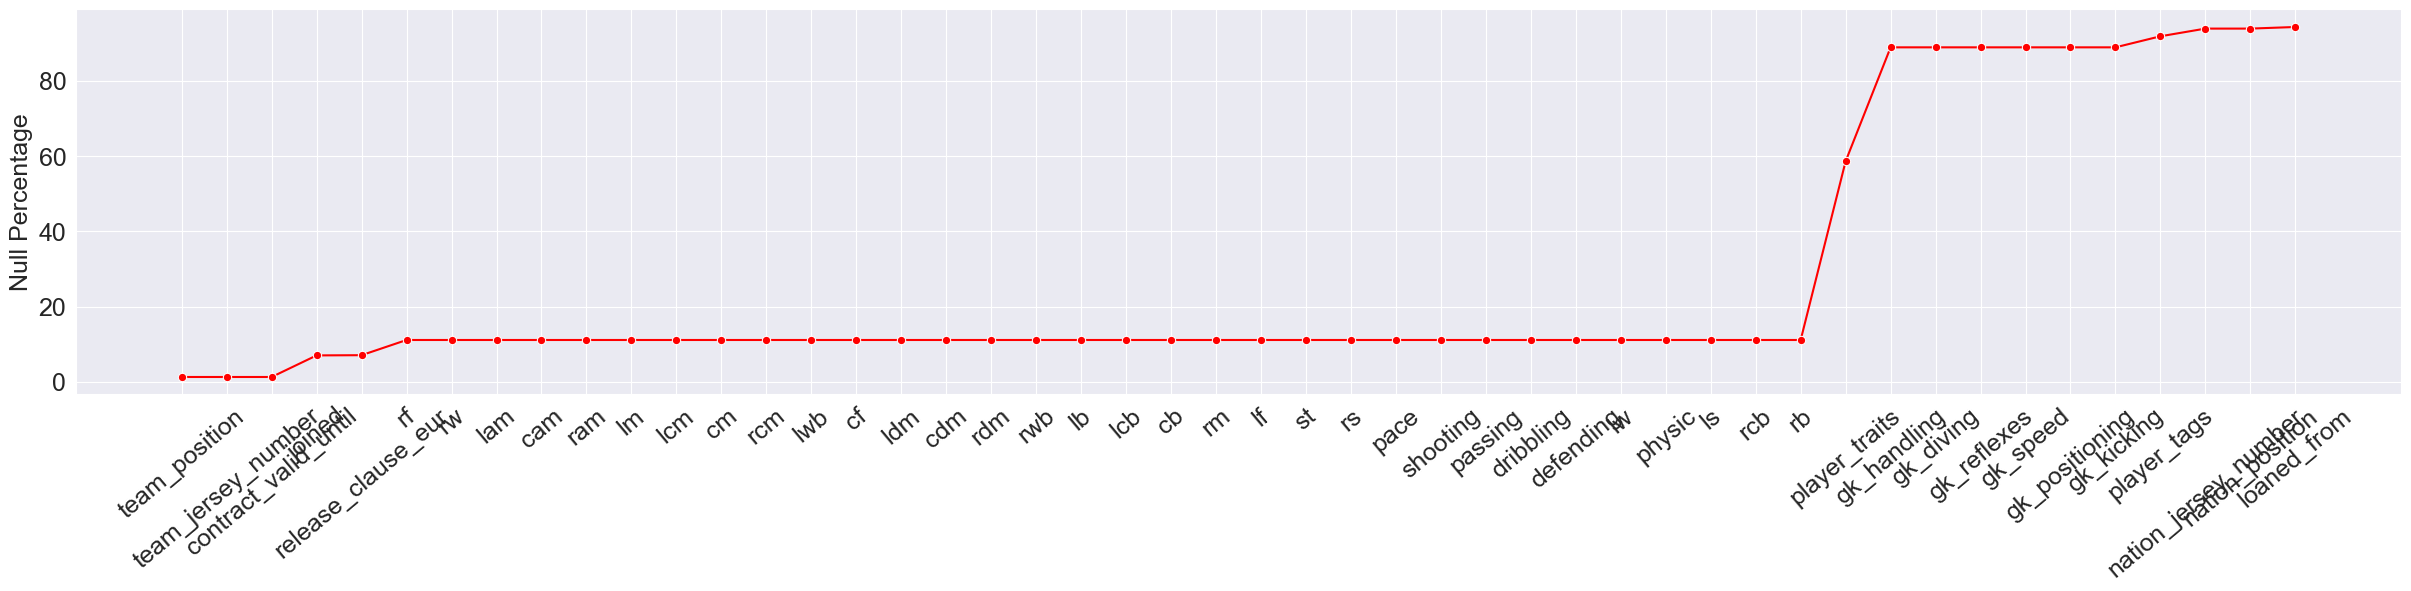

In [23]:
null_percentage = (null_counts/len(df))*100
plt.figure(figsize=(30,5))
sns.lineplot(null_percentage.sort_values(), marker="o", color = "r")
plt.xticks(rotation = 40,fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylabel("Null Percentage",fontsize=18)
plt.show()

## Univariate Analysis 

In [25]:
num_cols =  df.select_dtypes(exclude="O").drop(columns  = ["sofifa_id","team_jersey_number","contract_valid_until","nation_jersey_number",
                                                           "international_reputation","weak_foot","skill_moves"])
num_cols = num_cols.columns
len(num_cols)

54

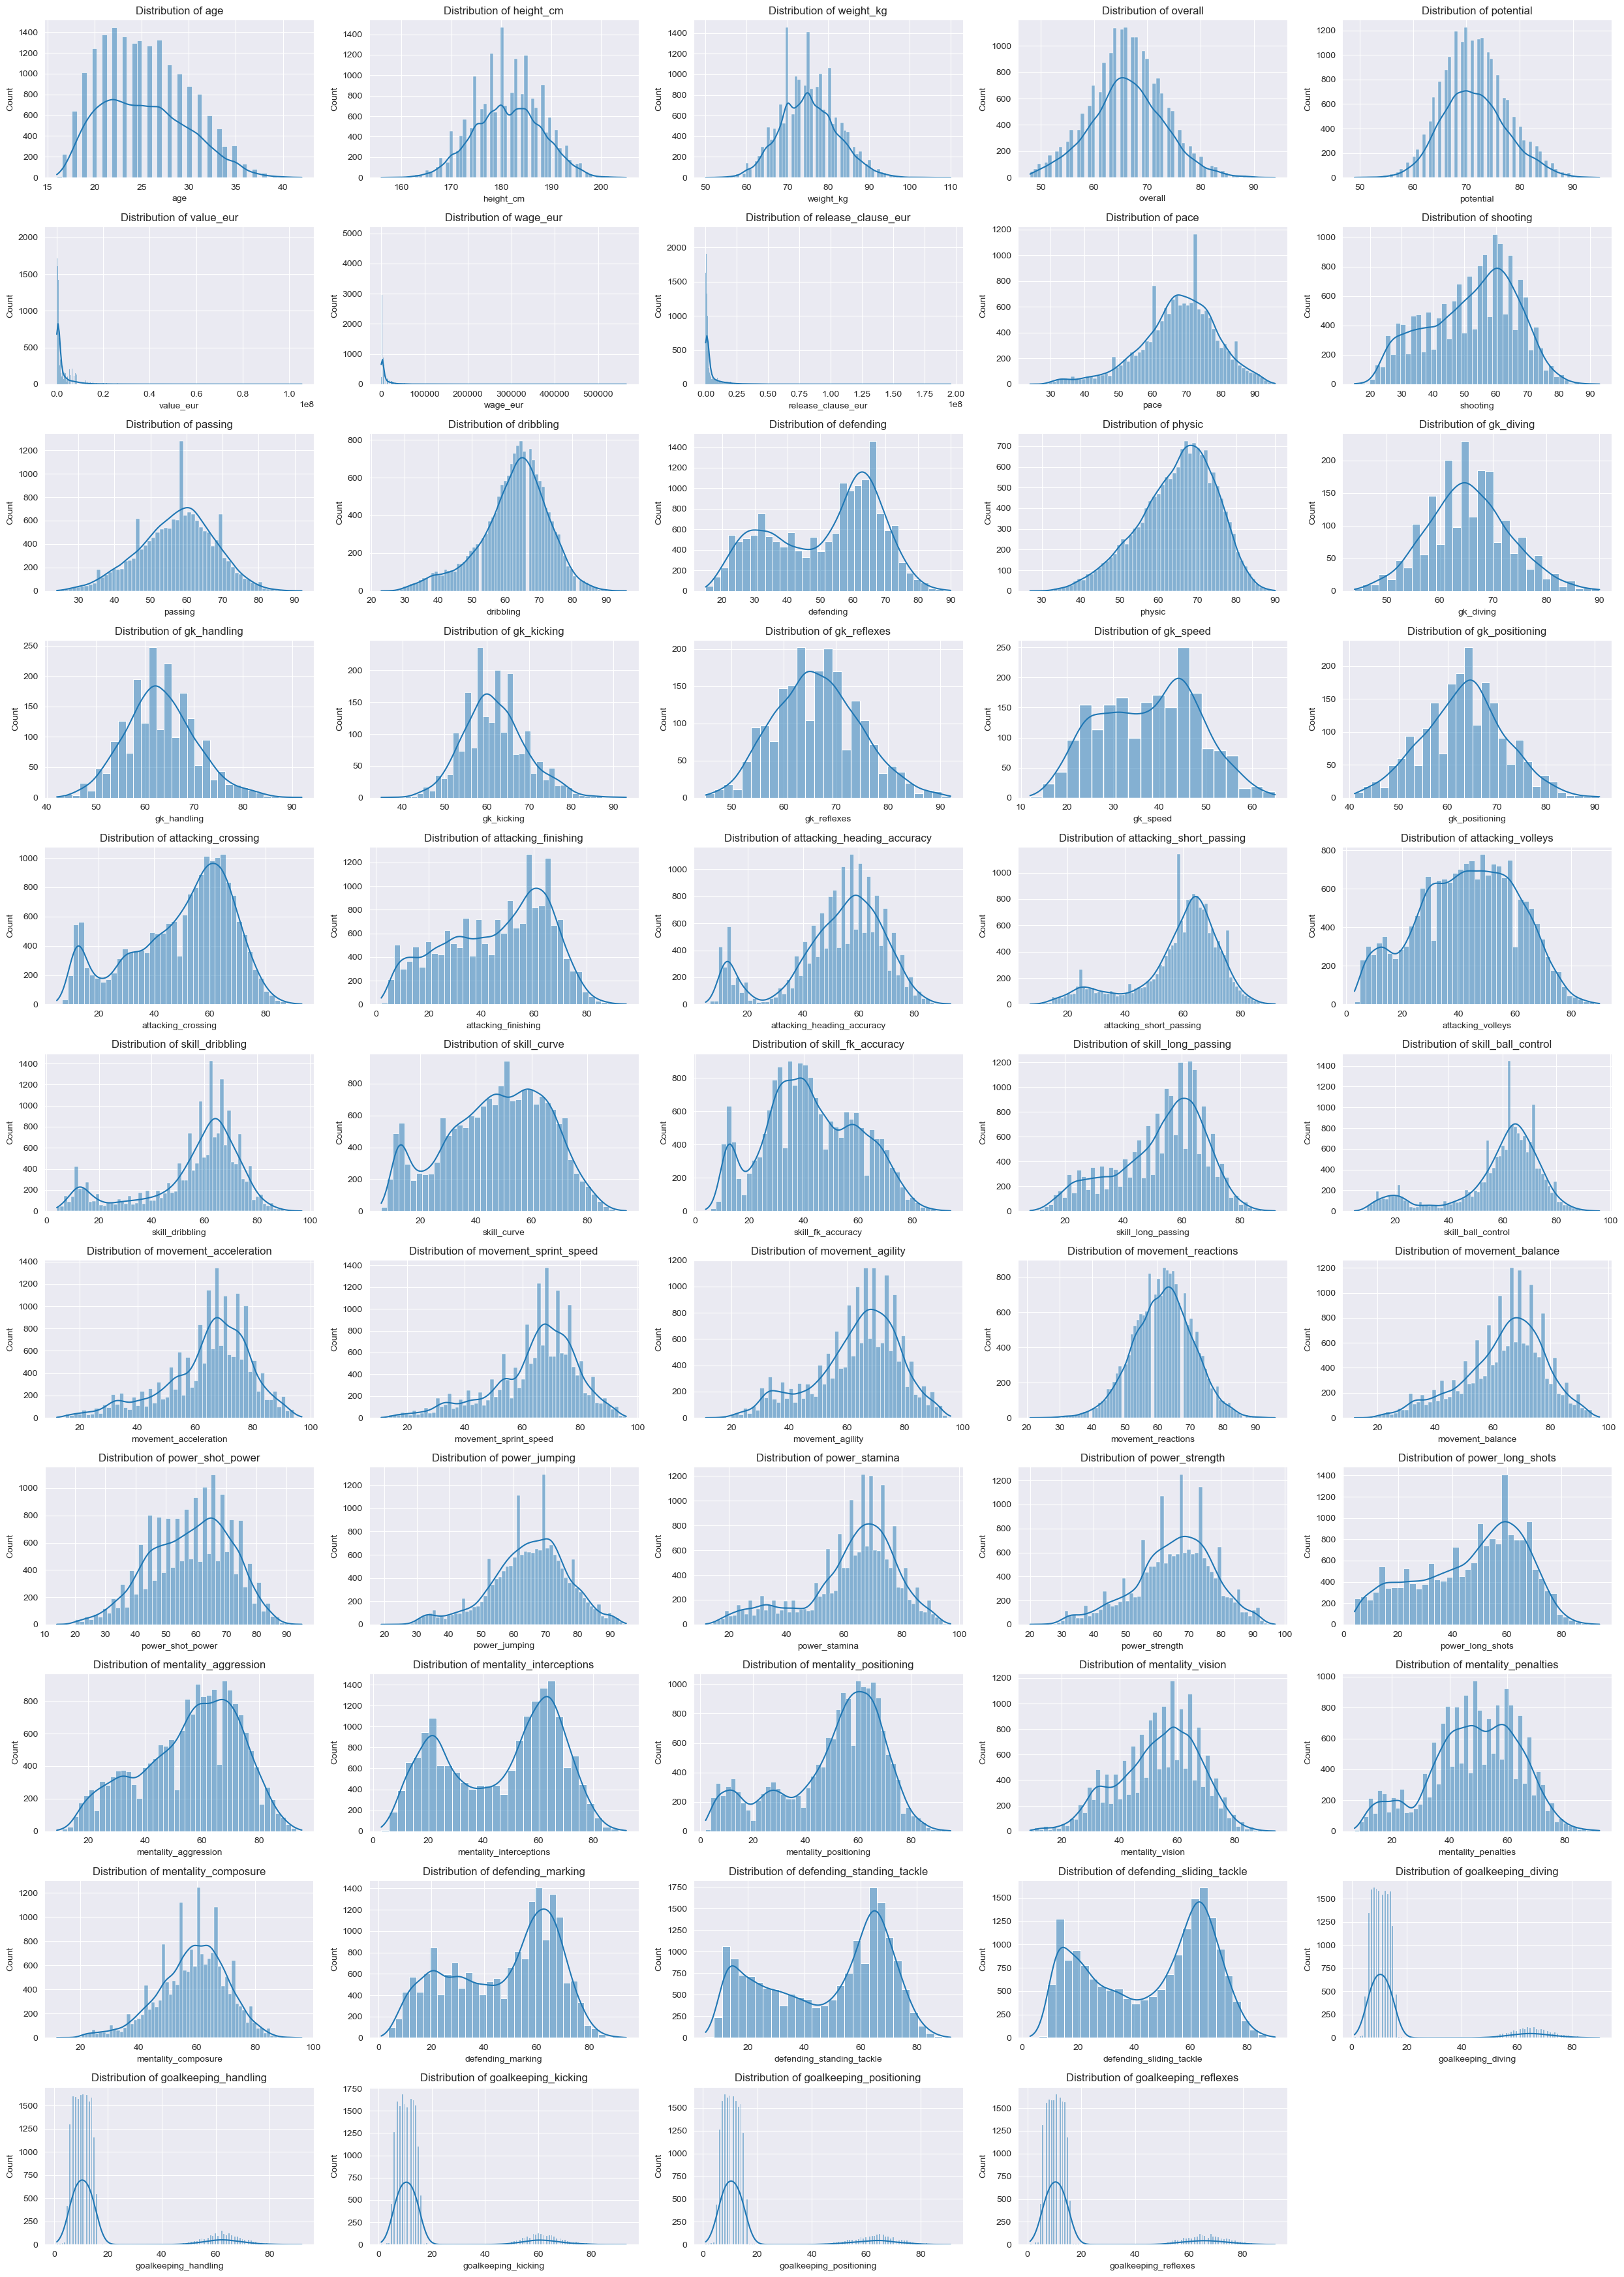

In [27]:
plt.figure(figsize=(25,35))
w = 1
for i in num_cols:
    plt.subplot(11,5,w)
    sns.histplot(x = i, data = df, kde=True)
    plt.title(f"Distribution of {i}")
    w+=1
plt.tight_layout()

In [28]:
cat_cols = pd.concat([df.select_dtypes(include="O").drop(columns = ["player_url","short_name","long_name","dob","player_tags","joined",
                                              "player_traits"]),df[["international_reputation","weak_foot","skill_moves"]]],axis=1)
cat_cols = cat_cols.columns

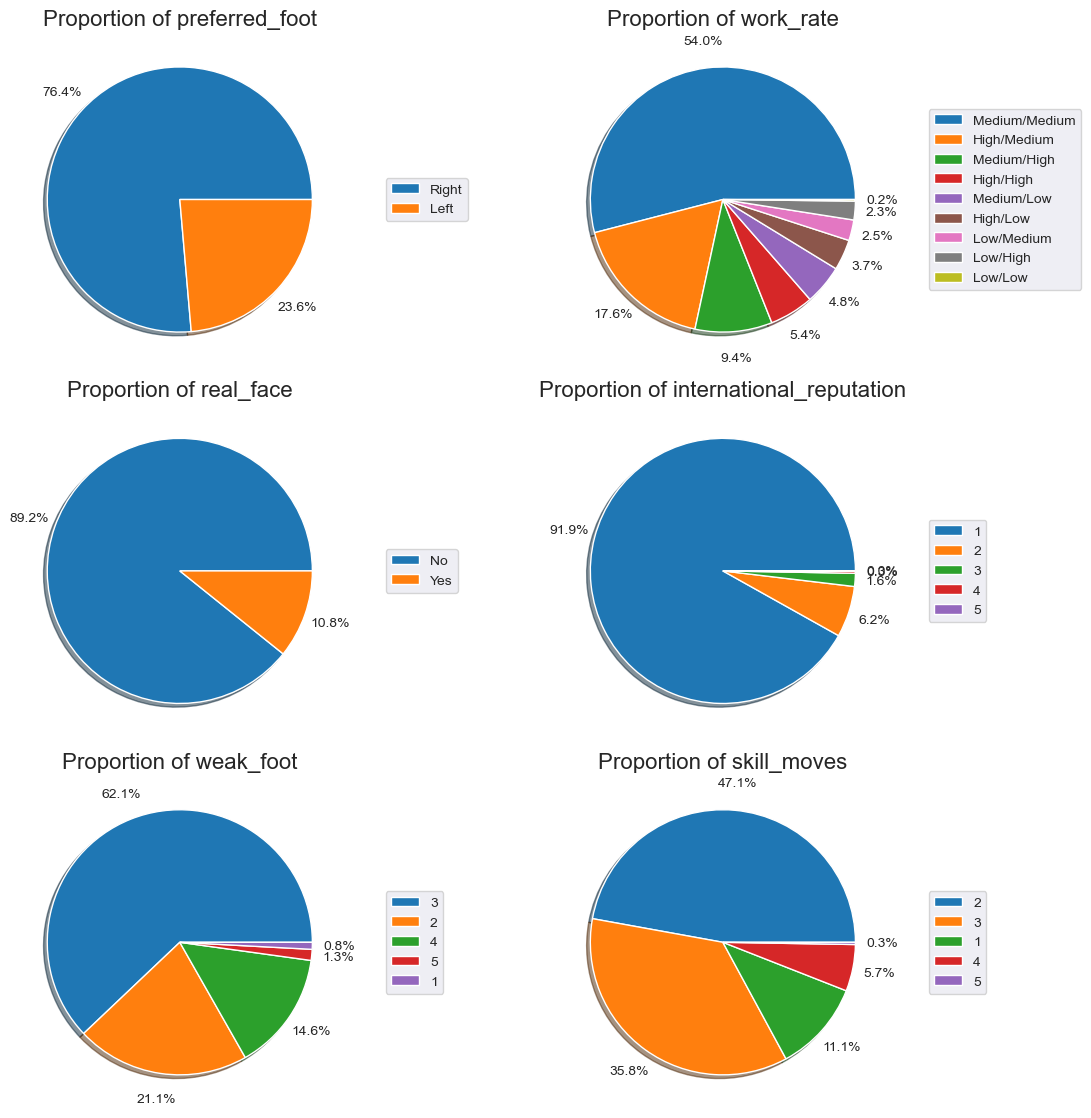

In [29]:
for_pie = [ 'preferred_foot','work_rate', 'real_face','international_reputation', 'weak_foot', 'skill_moves']
plt.figure(figsize=(12,15))
w = 1
for i in for_pie:
    values = df[i].value_counts()
    plt.subplot(4,2,w)
    plt.pie(values,autopct='%1.1f%%',pctdistance=1.2,
            shadow=True,textprops={'fontsize': 10, 'fontname': 'Arial'})
    plt.title(f"Proportion of {i}",fontsize=16, fontname='Arial')
    plt.legend(values.index,loc="center left", bbox_to_anchor=(1.1, 0.5))
    w+=1
plt.tight_layout()
plt.show()

#### **Key Takeaways:**

- **Preferred Foot:** More than **75%** of players predominantly use their **right foot**, indicating a strong preference for right-footed players.
- **Work Rate:** Around **50%** of players exhibit a **medium degree of effort** in both attacking and defensive aspects, highlighting a balanced playing style.
- **Real Face:** **89%** of players have a real face, while **11%** do not.
- **International Reputation:** **91%** of players have an international reputation of 1, with fewer rated higher.
- **Skill Moves:** Ratings of **2** and **3** are most common, indicating moderate skill levels.
- **Weak Foot:** Most players have a weak foot rating of **2** or **3**, suggesting a weaker non-dominant foot.
foot.

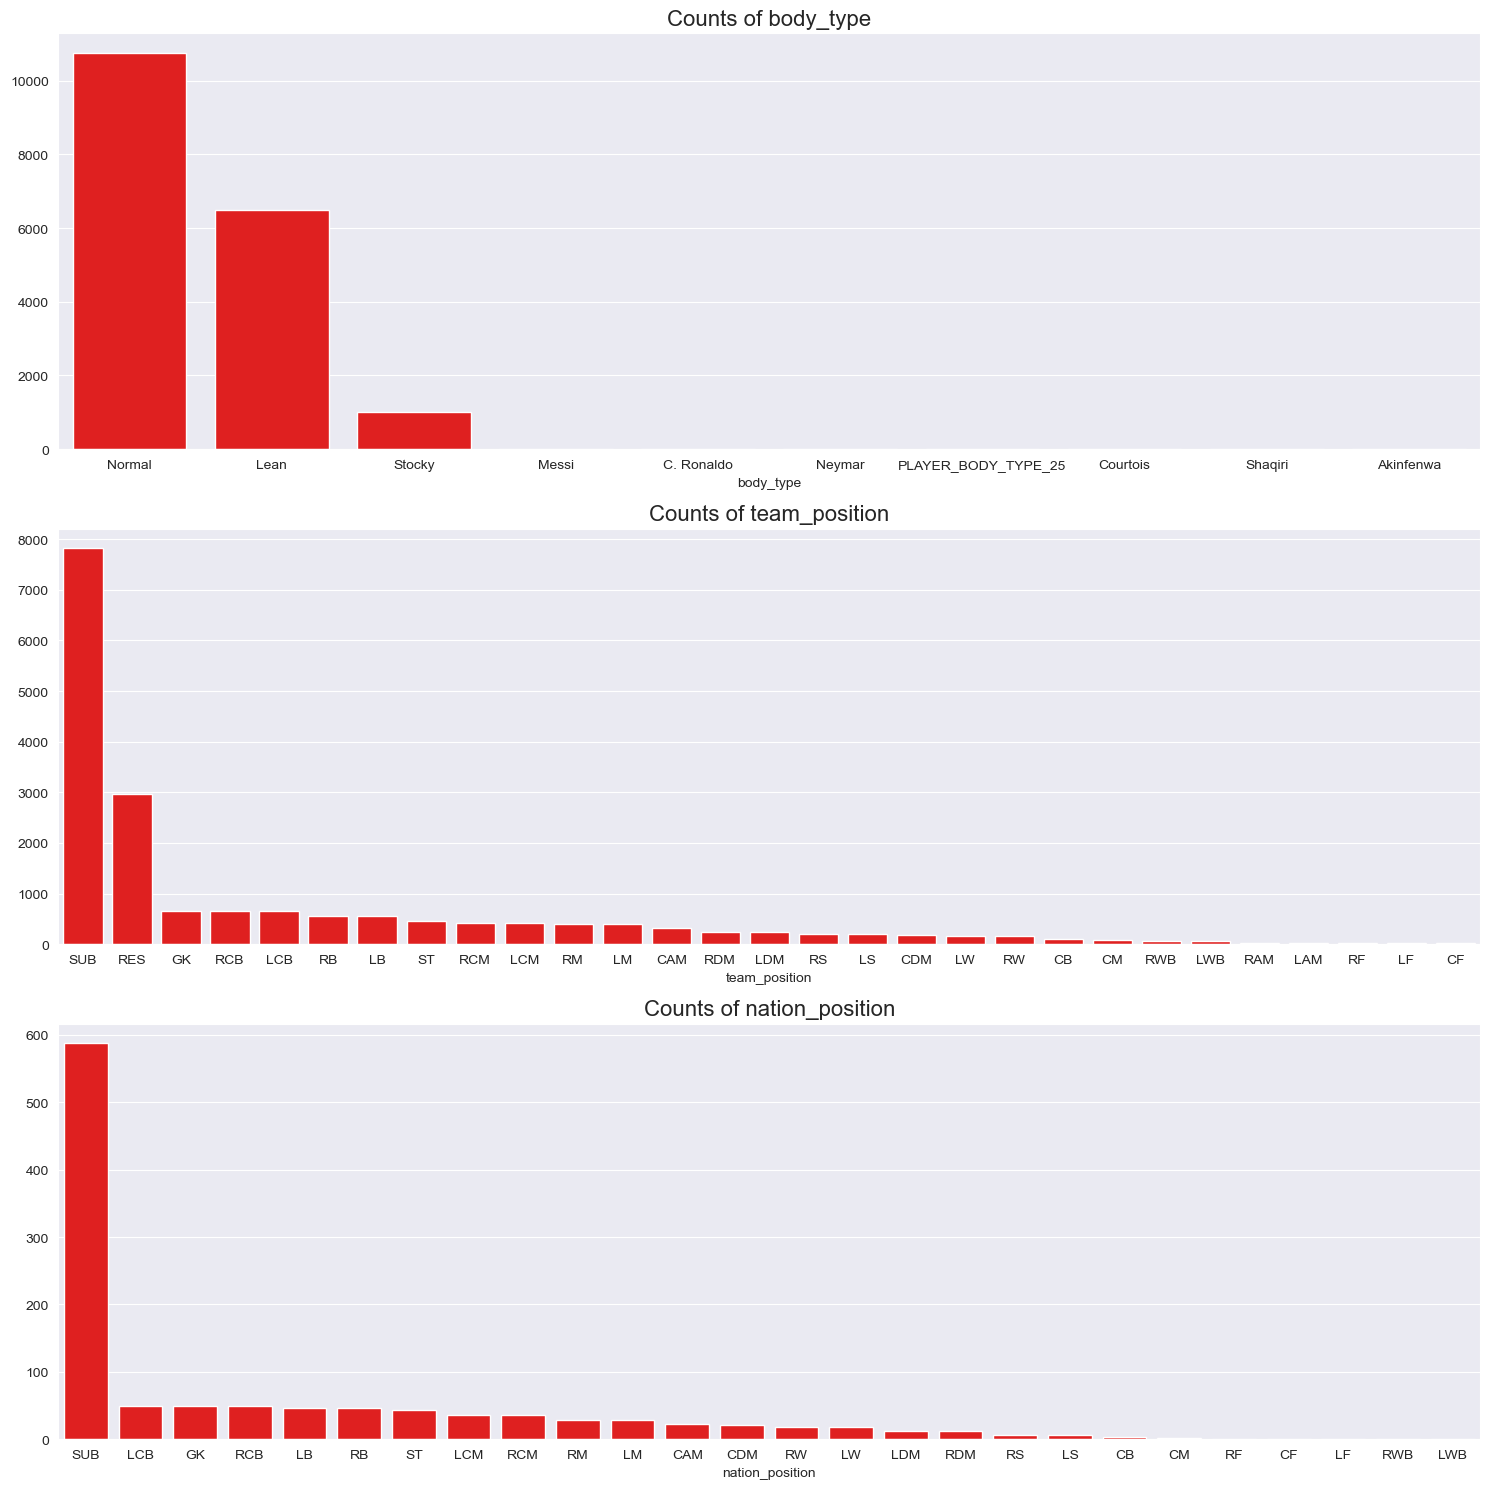

In [30]:
for_bar = ["body_type","team_position","nation_position"]

plt.figure(figsize=(15,15))
w=1
for i in for_bar:
    values = df[i].value_counts()
    plt.subplot(3,1,w)
    sns.barplot(x = values.index, y = values.values, color="r")
    plt.title(f"Counts of {i}",fontsize=16, fontname='Arial')
    w+=1
plt.tight_layout()


#### **Key Takeaways:**

- Most players have a **"Normal"** or **"Lean"** body type, with elite players like **Messi** and **Ronaldo** showing physical diversity.
- The majority of players are categorized as **"SUB"** or **"RES,"** indicating a large number of substitute and reserve players.
- **Attacking positions** such as **ST, CAM,** and **CF** are the least common, reflecting their more specialized roles compared to defensive and central positions.
ns.
 foot.
ns.
.

## Multivariate Analysis

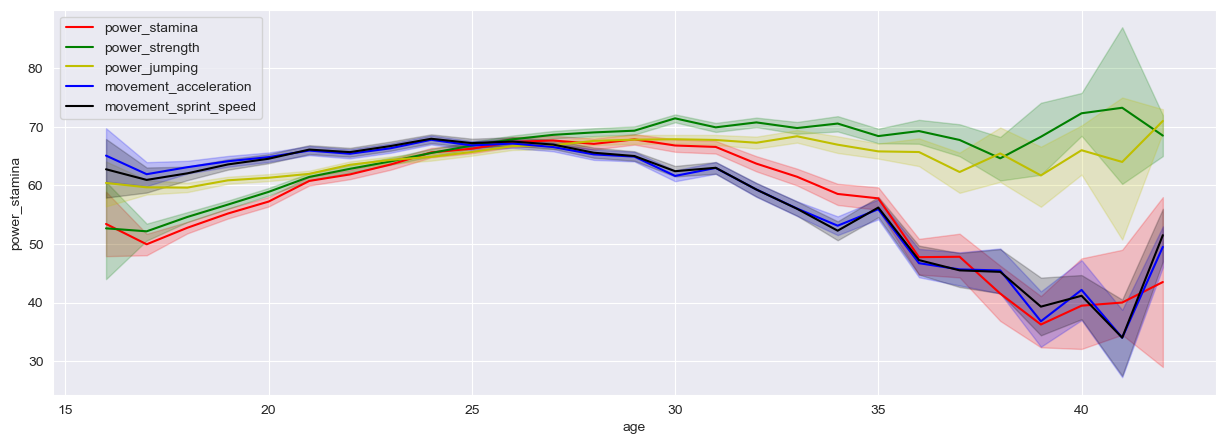

In [31]:
columns_and_colors = [("power_stamina", "r"),
                     ("power_strength", "g"),
                     ("power_jumping", "y"),
                     ("movement_acceleration", "b"),
                     ("movement_sprint_speed", "black")]

plt.figure(figsize=(15, 5))
for column, color in columns_and_colors:
    sns.lineplot(x="age", y=column, data=df, color=color, label=column)
plt.show()

#### **Key Takeaways:**  

- **Physical attributes** like **stamina**, **acceleration**, and **sprint speed** decline after age 30, while **strength** and **jumping** maintain a consistent level, showing less decline compared to the others. 
- Some attributes also show slight increases after age 40.
.

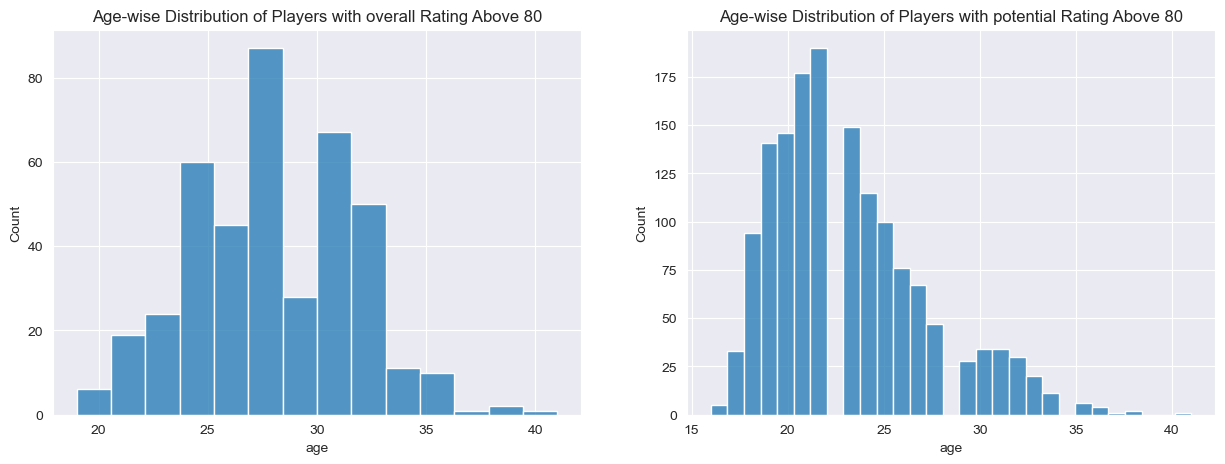

In [32]:
plt.figure(figsize=(15,5))
rating = ["overall","potential"]
w = 1
for i in rating:
    plt.subplot(1,2,w)
    sns.histplot(df.loc[df[i]>80,"age"])
    plt.title(f"Age-wise Distribution of Players with {i} Rating Above 80")
    w+=1

#### **Key Takeaways:**  

- **Younger players** tend to have higher **potential ratings**, with a peak around age **20**, while **older players**, primarily between **25 and 30**, maintain higher **overall ratings**, peaking around age **27**.


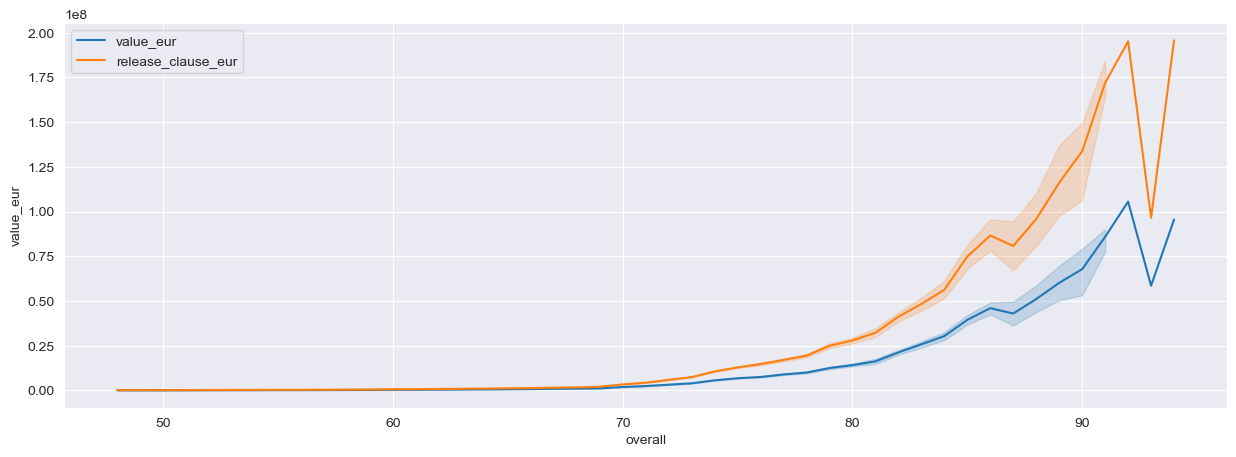

In [33]:
eur = ["value_eur","release_clause_eur"]
plt.figure(figsize=(15,5))
for i in eur:
    sns.lineplot(x = "overall", y = i , data =df, label= i)

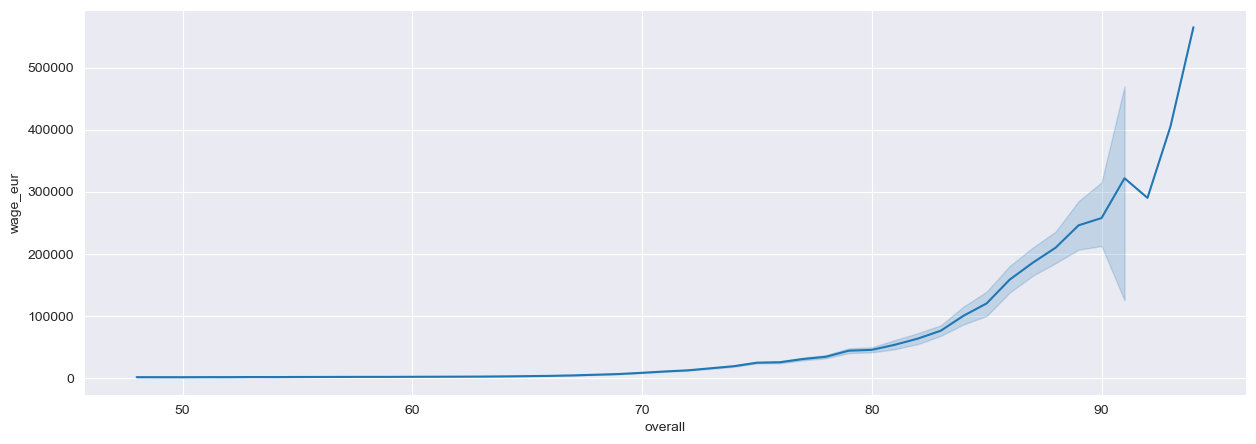

In [43]:
plt.figure(figsize=(15,5))
sns.lineplot(x = "overall", y = "wage_eur" , data =df)
plt.show()

#### **Key Takeaways:**  

- As **overall ratings** increase from **85 to 95**, there is a direct correlation with rising **value**, **wages**, and **release clauses** in euros. 
- Players with higher ratings command significantly higher **market value**, **wages**, and **release clauses**, while those with lower ratings have lower values, emphasizing that **performance ratings** are a key factor in determining a player's worth in the market.


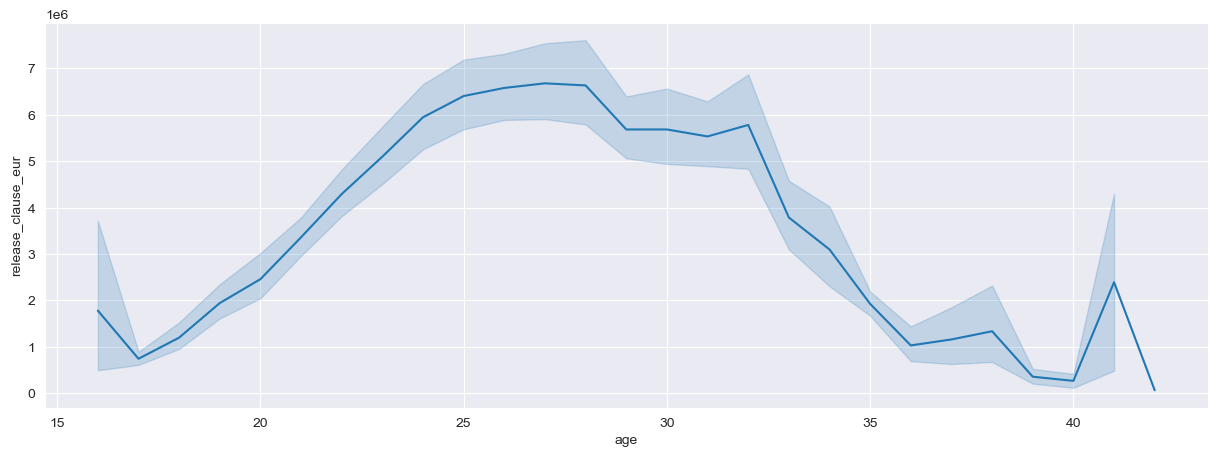

In [47]:
plt.figure(figsize=(15,5))
sns.lineplot(x = "age", y = "release_clause_eur" , data =df)
plt.show()

#### **Key Takeaways:**  

- **Release clauses** increase until age **28**, then decline as players age, reflecting a peak in **market value** in their late 20s followed by a decrease.


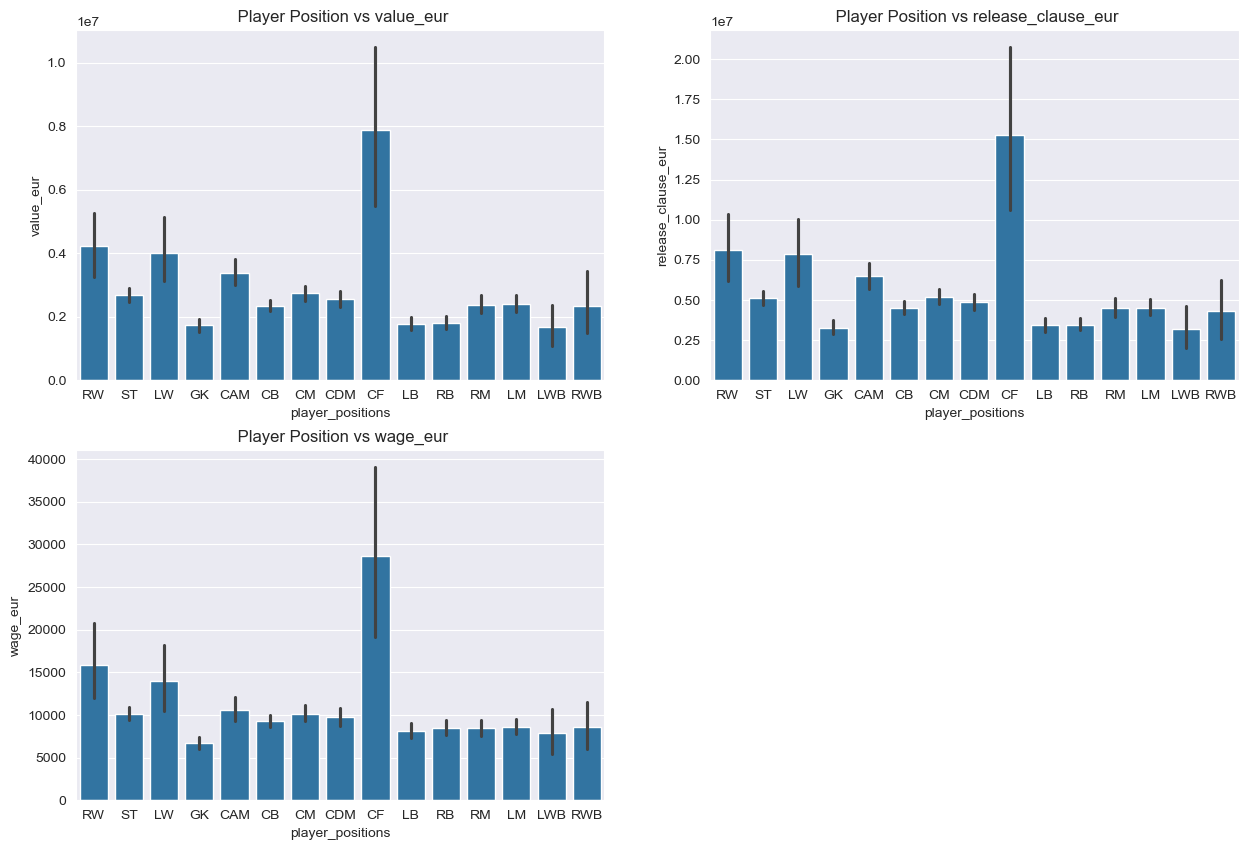

In [49]:
eur = ["value_eur","release_clause_eur","wage_eur"]
plt.figure(figsize=(15,10))
for i,col in enumerate(eur):
    plt.subplot(2,2,i+1)
    sns.barplot(x = df.player_positions.str.split(",").str[0], y = col , data = df)
    plt.title(f" Player Position vs {col}")

#### **Key Takeaways:**  

- **Attacking positions**, especially **CFs**, dominate in **value**, **release clauses**, and **wages**, highlighting their critical role and market demand, while **defensive roles** are undervalued despite their importance.


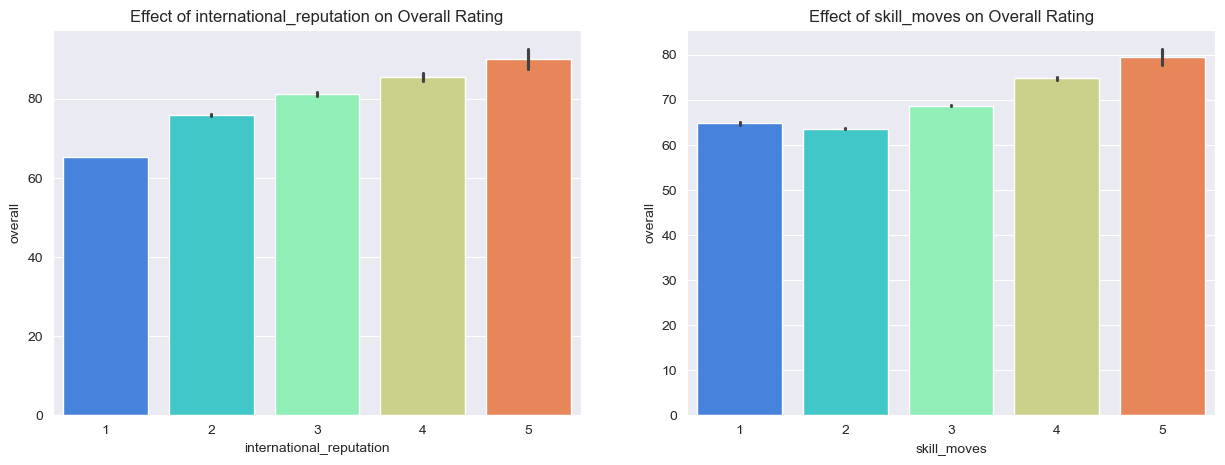

In [51]:
cols = ["international_reputation","skill_moves"]
w = 1
plt.figure(figsize=(15,5))
for i in cols:
    plt.subplot(1,2,w)
    sns.barplot(x =i, y = "overall", data  = df, palette="rainbow")
    plt.title(f"Effect of {i} on Overall Rating")
    w+=1

#### **Key Takeaways:**  

- Higher **international reputation** and **skill moves** are positively correlated with higher **overall ratings**, indicating that **global recognition** and **technical abilities** enhance player performance.


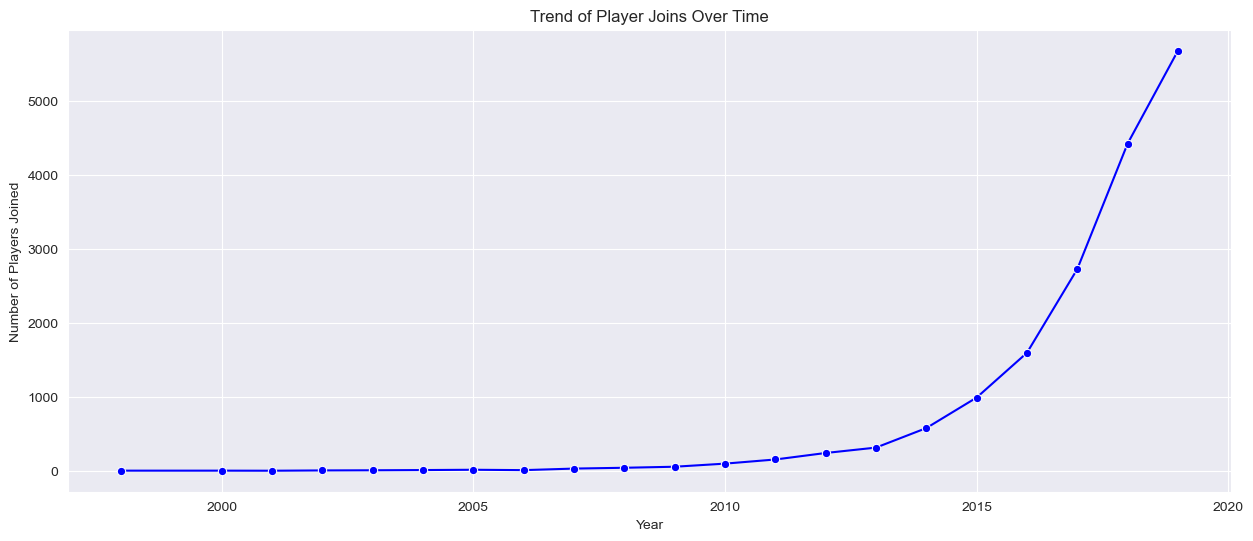

In [53]:
plt.figure(figsize=(15, 6))

join_trend = pd.to_datetime(df['joined']).dt.year.value_counts().sort_index()

sns.lineplot(x=join_trend.index, y=join_trend.values, marker='o', color='blue')
plt.title('Trend of Player Joins Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Players Joined')
plt.show()

#### **Key Takeaways:**

- The sharp increase in **players joining after 2015** underscores the critical need for **scaling infrastructure**, **resources**, and **support systems** to effectively manage and sustain rapid growth.


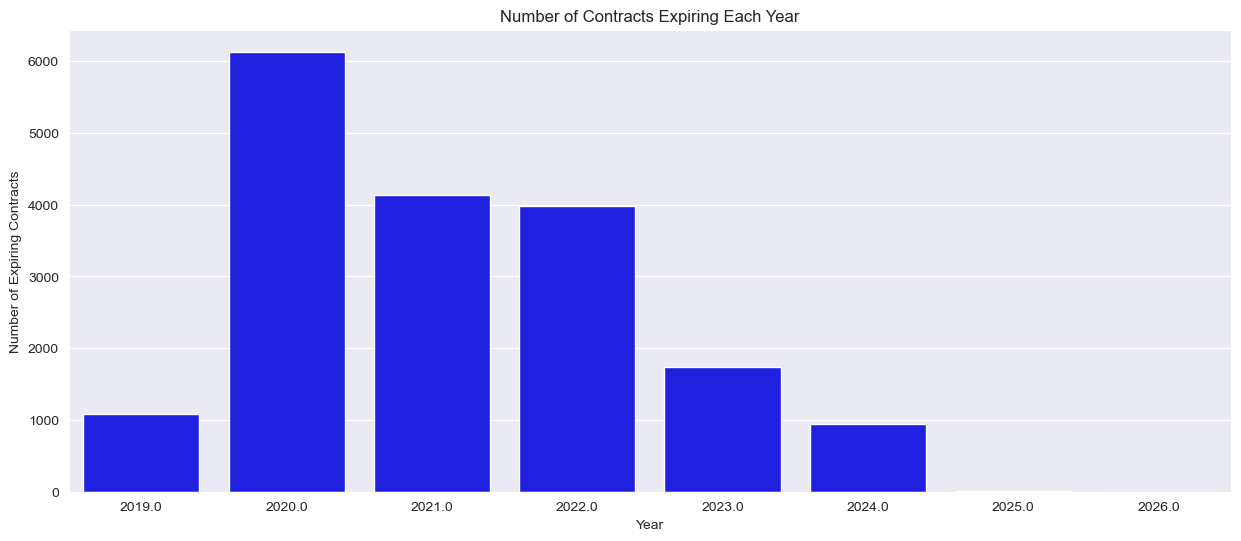

In [55]:
plt.figure(figsize=(15, 6))

contract = df["contract_valid_until"].value_counts().sort_index()

sns.barplot(x=contract.index, y=contract.values, color='blue')
plt.title('Number of Contracts Expiring Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Expiring Contracts')
plt.show()

#### **Key Takeaways:**
- The peak in **contract expirations in 2020** emphasizes the importance of **proactive planning** and **strategic management** to handle surges in **renewal demands**, ensuring smooth transitions and minimizing disruptions during high-volume periods.


## Multivariate Analysis

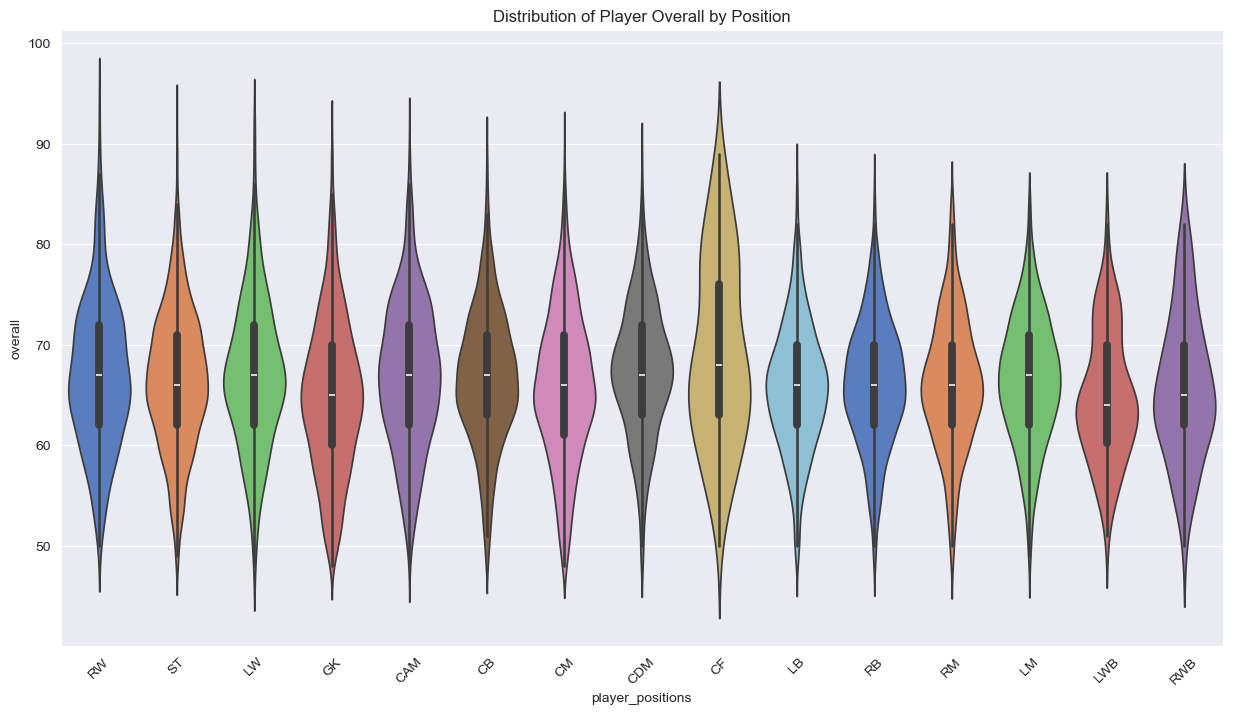

In [57]:
plt.figure(figsize=(15, 8))
sns.violinplot(x=df['player_positions'].str.split(',').str[0], y=df['overall'], palette='muted')
plt.xticks(rotation=45)
plt.title('Distribution of Player Overall by Position')
plt.show()

#### **Key Takeaways**:

- **CF players** tend to have higher overall ratings, with a concentration of top-rated players, while other positions like **CB**, **ST**, **CM**, and **GK** display a more uniform distribution around the center.
- **Goalkeepers (GK)** generally have lower ratings due to their specialized role.
- Outliers are present in positions like **CF** and **ST**, where a few top players dominate the ratings.
- Positions with fewer players, such as **LWB** and **RWB**, show less variation, with smaller plot sections indicating less data.
- Overall, positions with more players tend to have broader rating distributions, while specialized roles show more consistency in their ratings.


### Insights from EDA

- **Age**: Average age is **25**, with a range from **16 to 42**, indicating most players are in their peak years.
- **Height & Weight**: Follow a **normal distribution**, with mean and median closely aligned.
- **Overall Rating**: Average rating is **66**, with a top rating of **94**, showing a wide skill range.
- **Potential**: Average potential is **71**, suggesting room for growth.
- **Pace**: Average score is **67.7**, highlighting the importance of speed.
- **Key Skills**: Strongest skills are **dribbling (62.5)**, followed by **passing (57.2)** and **shooting (52.3)**.
- **Value**: Average player value is **€2.48M**, with top players valued up to **€105.5M**.
- **Wages**: Average weekly wage is **€9,457**, with top earners at **€565,000/week**.
- **Contract Validity**: Most contracts expire by **2021**, with the latest extending to **2026**.
- **International Reputation**: Average reputation is **1.1**, with a few players reaching **5**.
- **Physicality**: Average physical rating is **64.8**, with strong **jumping (64.3)** and **stamina (64.4)**.
- **Goalkeeping Stats**: Goalkeeper-specific stats average **16**, with null values due to non-goalkeepers not having data for these attributes.
- **Player Nationalities**: Players represent **162 countries**.
- **Missing Data**: Several columns, including **player_tags**, **loaned_from**, **nation_position**, **nation_jersey_number**, and goalkeeper stats, have over **88% missing data**, making them unreliable for analysis. **Player_traits** also has over **50% missing data**.
- **Player Diversity**: Wide variety in age, height, and skills, catering to different roles.
- **Value Concentration**: Top players command high value and wages, while most are lower.
- **Skill Trends**: Pace, dribbling, and passing are key, with defending and physicality important for specific positions.
- **Goalkeeper Stats**: Goalkeeper data is sparse, with only **2036 entries**, due to non-goalkeepers having null values for their skills.
- **Movement Skills**: Average sprint speed is **64**, agility is **63**, and reactions are **61**, with top players reaching up to **96**.


## Task-3:Explore the data and attempt all the below asked questions in a step by step manner

**1.Prepare a rank ordered list of top 10 countries with most players. Which countries are producing the most footballers that play at this level?**

In [59]:
countries = pd.DataFrame(df.groupby("nationality")["sofifa_id"].count())
countries.reset_index(inplace=True)
top_10 = countries.sort_values(by = "sofifa_id",ascending=False).reset_index()[:10]
top_10 = top_10.drop(columns="index")
top_10

nationality  sofifa_id
0      England       1667
1      Germany       1216
2        Spain       1035
3       France        984
4    Argentina        886
5       Brazil        824
6        Italy        732
7     Colombia        591
8        Japan        453
9  Netherlands        416

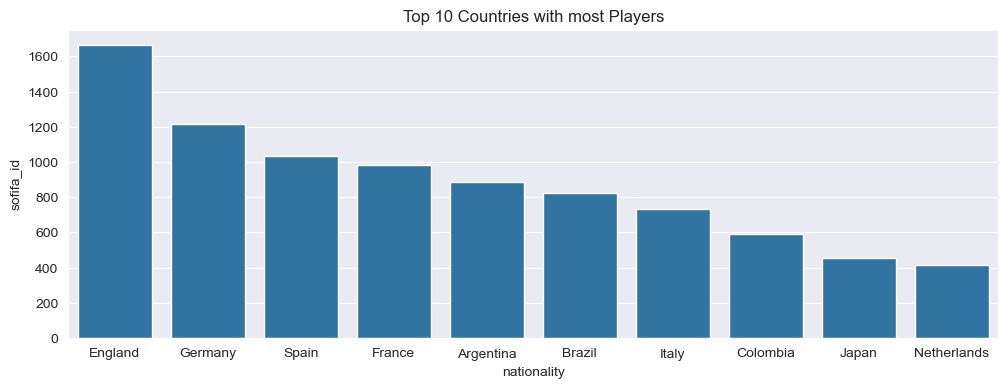

In [61]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,4))
sns.barplot(x = "nationality", y = "sofifa_id", data = top_10)
plt.title("Top 10 Countries with most Players")
plt.show()

### Insights from the Top 10 Countries Producing the Most Footballers

1. **England** leads the ranking with 1,667 players, showcasing its dominance in producing footballers at this level. This highlights England's strong football culture and robust infrastructure.
2. **Germany** follows with 1,216 players, reflecting its consistent focus on developing high-quality football talent.
3. **Spain** ranks third with 1,035 players, known for its technically skilled players and successful football academies.
4. **France** contributes 984 players, emphasizing its role as a powerhouse in nurturing diverse and talented athletes.
5. **Argentina** is the highest-ranked South American country with 886 players, indicating its legacy of producing world-class football talent.
6. **Brazil**, with 824 players, continues to uphold its reputation as a football-loving nation known for skillful and creative players.
7. **Italy** provides 732 players, reflecting its historical strength in football and strategic youth development programs.
8. **Colombia** appears with 591 players, showcasing its growing prominence in football at the international level.
9. **Japan**, with 453 players, is the only Asian country in the top 10, highlighting its commitment to football development and global representation.
10. **Netherlands** rounds out the list with 416 players, emphasizing its well-known football academies and focus on youth development.

#### Key Takeaways:
- European nations **(England, Germany, Spain, France, Italy, Netherlands)** dominate the top spots, reflecting their advanced football systems and investments. 
- South American countries like **Argentina and Brazil** remain integral in producing globally recognized football talent.
- **Japan's** inclusion highlights the increasing influence of Asian countries in the global football landscape.


**2.Plot the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving?**

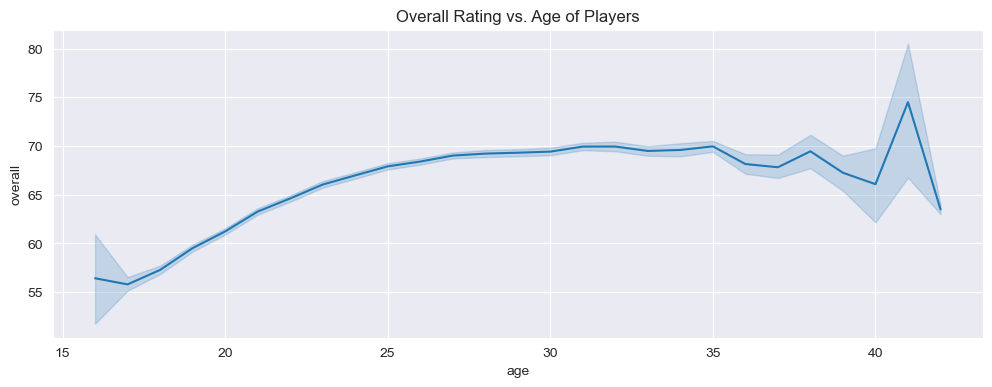

In [63]:
plt.figure(figsize=(12,4))
sns.lineplot( x = "age", y = "overall", data = df)
plt.title("Overall Rating vs. Age of Players")
plt.show()

### Insights from the Overall Rating vs. Age of Players

1. **Improvement Phase**: Players show a steady improvement in their overall rating from age **15** to approximately age **30**. This highlights their growth and skill development during their prime years.

2. **Plateau Phase**: From age **30 to 35**, players maintain a consistent overall rating, suggesting they reach their peak performance and stabilize without significant improvement.

3. **Decline Phase**: **After age 35**, the overall rating starts to decline, indicating a reduction in performance, likely due to physical limitations and aging.

4. **Outlier Observation**: The spike in ratings for players **above age 40** could be influenced by a smaller sample size or the presence of exceptional players in this category.

#### Key Takeaways:
**Players typically stop improving after the age of 30 and begin to experience a decline in performance after age 35.**

**3.Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger?** 

In [65]:
positions =pd.DataFrame(df.groupby(df.player_positions.str.split(",").str[0])["wage_eur"].mean())
positions.reset_index(inplace=True)
positions = positions[positions["player_positions"].isin(['ST', 'RW', 'LW'])]

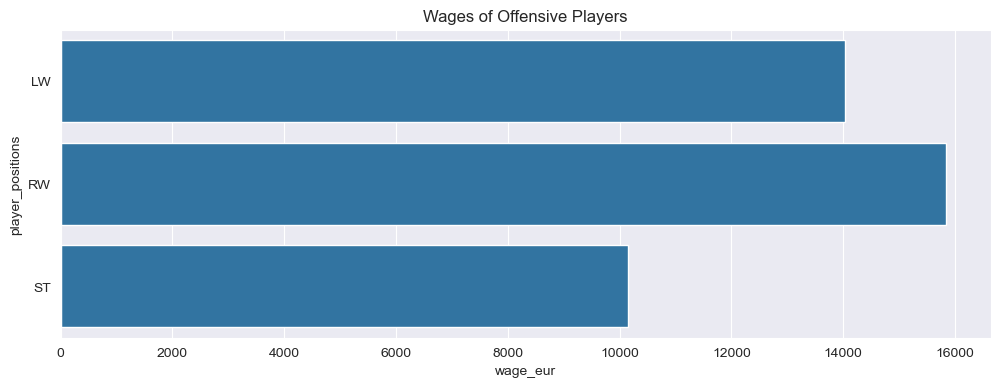

In [67]:
plt.figure(figsize=(12,4))
sns.barplot(y = "player_positions", x = "wage_eur" , data = positions)
plt.title("Wages of Offensive Players")
plt.show()

### Insights on Offensive Players and Wages

1. **Right-Wingers (RW)**: With an average wage of **€15,848.24**, right-wingers are the highest-paid offensive players. This suggests their crucial role in creating scoring opportunities and contributing to team success.

2. **Left-Wingers (LW)**: Left-wingers earn an average wage of **€14,037.04**, slightly less than right-wingers, but still significant, indicating their importance in offensive play.

3. **Strikers (ST)**: Strikers earn an average wage of **€10,152.59**, making them the lowest-paid among the offensive positions. This might indicate that while they are critical for scoring goals, wingers’ versatility and playmaking abilities might be valued more financially.

#### Key Takeaways:
**Right-wingers** tend to get paid the most among offensive players, likely due to their strategic importance in modern football. 


# Data Preprocessing

## Dropping unnecessary Columns

In [69]:
to_drop = ['sofifa_id','player_url','short_name','long_name','dob','nationality','club','real_face','player_tags','team_position',
           'team_jersey_number','loaned_from','joined','contract_valid_until','nation_position','nation_jersey_number','player_traits',
           'ls','st','rs', 'lw', 'lf', 'cf', 'rf', 'rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lcb',
            'lb','cb','rcb','rb',"overall" ]

df.drop(columns=to_drop, axis=1, inplace=True)

df.shape

(18278, 60)

### Reasons for Dropping Columns:

1. **Position Ratings**: Redundant with `player_position`, simplifying the dataset.
2. **Identifiers/Metadata**: Columns like `'sofifa_id'`, `'player_url'`, `'long_name'`, and `'dob'` add no analytical value.
3. **Player Tags & Traits**: Redundant since player skills are already captured in rated columns.
4. **Jersey Numbers**: `'nation_jersey_number'`, `'team_jersey_number'` are not relevant to performance analysis.
5. **High Cardinality Columns**: `'nationality'`, `'club'` add complexity without significant insights.
6. **Overall**: Can dominate the model, focus on complete skillset for clustering.
7. **Other Features**:  
   - **`real_face`**: Irrelevant for performance.  
   - **`contract_valid_until`**: Not related to player skills.  
   - **`loaned_from`**: Doesn’t add performance value.  
   - **`joined`**: Doesn’t impact current performance.  
   - **`nation_position`, `team_position`**: Redundant with `player_position`.

Dropping these columns streamlines the dataset for better analysis.


In [71]:
df["player_positions"] = df["player_positions"].str.split(",").str[0]

df["attack_work_rate"], df["defence_work_rate"] = df["work_rate"].str.split("/").str[0], df["work_rate"].str.split("/").str[1]
df.drop(columns="work_rate", axis=1, inplace=True)

valid_body_types = ['Normal', 'Lean', 'Stocky']
df["body_type"] = df["body_type"].apply(lambda x: x if x in valid_body_types else np.nan)

## Encoding

In [73]:
player_position_map = {'RWB':0,'LWB':1,'CF':2,'RW':3,'LW':4,'LM':5,'RM':6,'CAM':7,'LB':8,'RB':9,'CDM':10,'GK':11,'CM':12,'ST':13,'CB':14}

df["player_positions_enc"] = df["player_positions"].map(player_position_map)

df.drop(columns="player_positions", axis=1, inplace=True)

In [75]:
attack_work_rate_map = {"Low":0, "Medium":1, "High":2}

df["attack_work_rate_enc"] = df["attack_work_rate"].map(attack_work_rate_map)

df.drop(columns="attack_work_rate",axis=1, inplace=True)

In [77]:
defence_work_rate_map = {"Low":0, "Medium":1, "High":2}

df["defence_work_rate_enc"] = df["defence_work_rate"].map(defence_work_rate_map)

df.drop(columns="defence_work_rate",axis=1, inplace=True)

In [79]:
body_type_mapping = {"Lean":0, "Normal":1, "Stocky": 2}

df["body_type_enc"] = df["body_type"].map(body_type_mapping)

df.drop(columns="body_type", axis=1 , inplace=True)

In [81]:
ohe = OneHotEncoder(drop="first", sparse_output= False)

df["preferred_foot_enc"] = ohe.fit_transform(df[["preferred_foot"]])

df.drop(columns="preferred_foot",axis=1,inplace=True)

In [83]:
df.shape

(18278, 61)

### Insights

### Encoding for Clustering Problem:

#### Reasons for Using `.map()` Encoding:
- **Prevents Sparse Matrices**: `.map()` avoids sparse matrices, saving memory and improving performance in clustering tasks with large datasets.
- **Improves Clustering**: Reduces dimensionality, ensuring clustering algorithms like **k-means** perform better with dense data.
- **Preserves Order**: Ordinal features like **`attack_work_rate`**, **`defence_work_rate`**, and **`body_type`** maintain their natural order (e.g., Low < Medium < High) without introducing complexity.
- **Compact Dataset**: Efficient encoding keeps the dataset compact, enhancing clustering performance.

#### Reasons for Using One-Hot Encoding (OHE):
- **Categorical Data Representation**: OHE treats categorical features like **`preferred_foot`** as binary variables, ensuring no ordinal relationships are assumed.
- **Clarity for Models**: OHE prevents any artificial hierarchy in non-ordered categorical features, which helps clustering algorithms interpret them independently.
- **Compatibility with Clustering**: Some clustering algorithms, like **k-means**, benefit from OHE when handling categorical features, as they require numeric input without imposed order.


## Null Handling

In [85]:
null_cols = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
             'gk_handling','gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning']

df[null_cols] =  df[null_cols].fillna(0)

In [87]:
null_counts = df.isnull().sum()[df.isnull().sum() > 0]
null_counts

release_clause_eur    1298
body_type_enc            7
dtype: int64

In [91]:
imputer = KNNImputer(n_neighbors=5)
imputer

KNNImputer()

In [93]:
df_imputed = imputer.fit_transform(df)
df = pd.DataFrame(df_imputed, columns=df.columns, index = df.index)

In [95]:
df.body_type_enc.value_counts()

body_type_enc
1.0    10753
0.0     6505
2.0     1016
0.8        2
0.6        1
0.4        1
Name: count, dtype: int64

In [97]:
df["body_type_enc"] = df["body_type_enc"].astype("int")
df.body_type_enc.value_counts()

body_type_enc
1    10753
0     6509
2     1016
Name: count, dtype: int64

### Insights 

#### Filling Null Values with 0:
- **Goalkeeper-Specific Columns**: Columns like **`gk_diving`**, **`gk_handling`**, **`gk_kicking`**, **`gk_reflexes`**, **`gk_speed`**, and **`gk_positioning`** have data only for goalkeepers. For non-goalkeeper rows, these columns show nulls. Filling with 0 ensures non-goalkeepers are accurately represented without disrupting analysis.
- **Player Attributes**: Columns like **`pace`**, **`shooting`**, **`passing`**, **`dribbling`**, **`defending`**, and **`physic`** are irrelevant for goalkeepers and show nulls in their rows. Filling these with 0 avoids misrepresentation and aligns attributes with player roles.
- **Dataset Integrity**: Replacing nulls with 0 ensures a consistent dataset, allowing all rows to be used effectively in analysis and modeling.

#### Handling Remaining Nulls with KNN Imputer:
  - Fills missing values by considering patterns in neighboring data points, ensuring realistic and contextually accurate imputations.
  - Utilizes correlations between features, preserving data relationships and consistency.

- **Outcome**: The combined approach ensures all null values are handled appropriately, creating a complete and reliable dataset for analysis and modeling.

## Correlation 

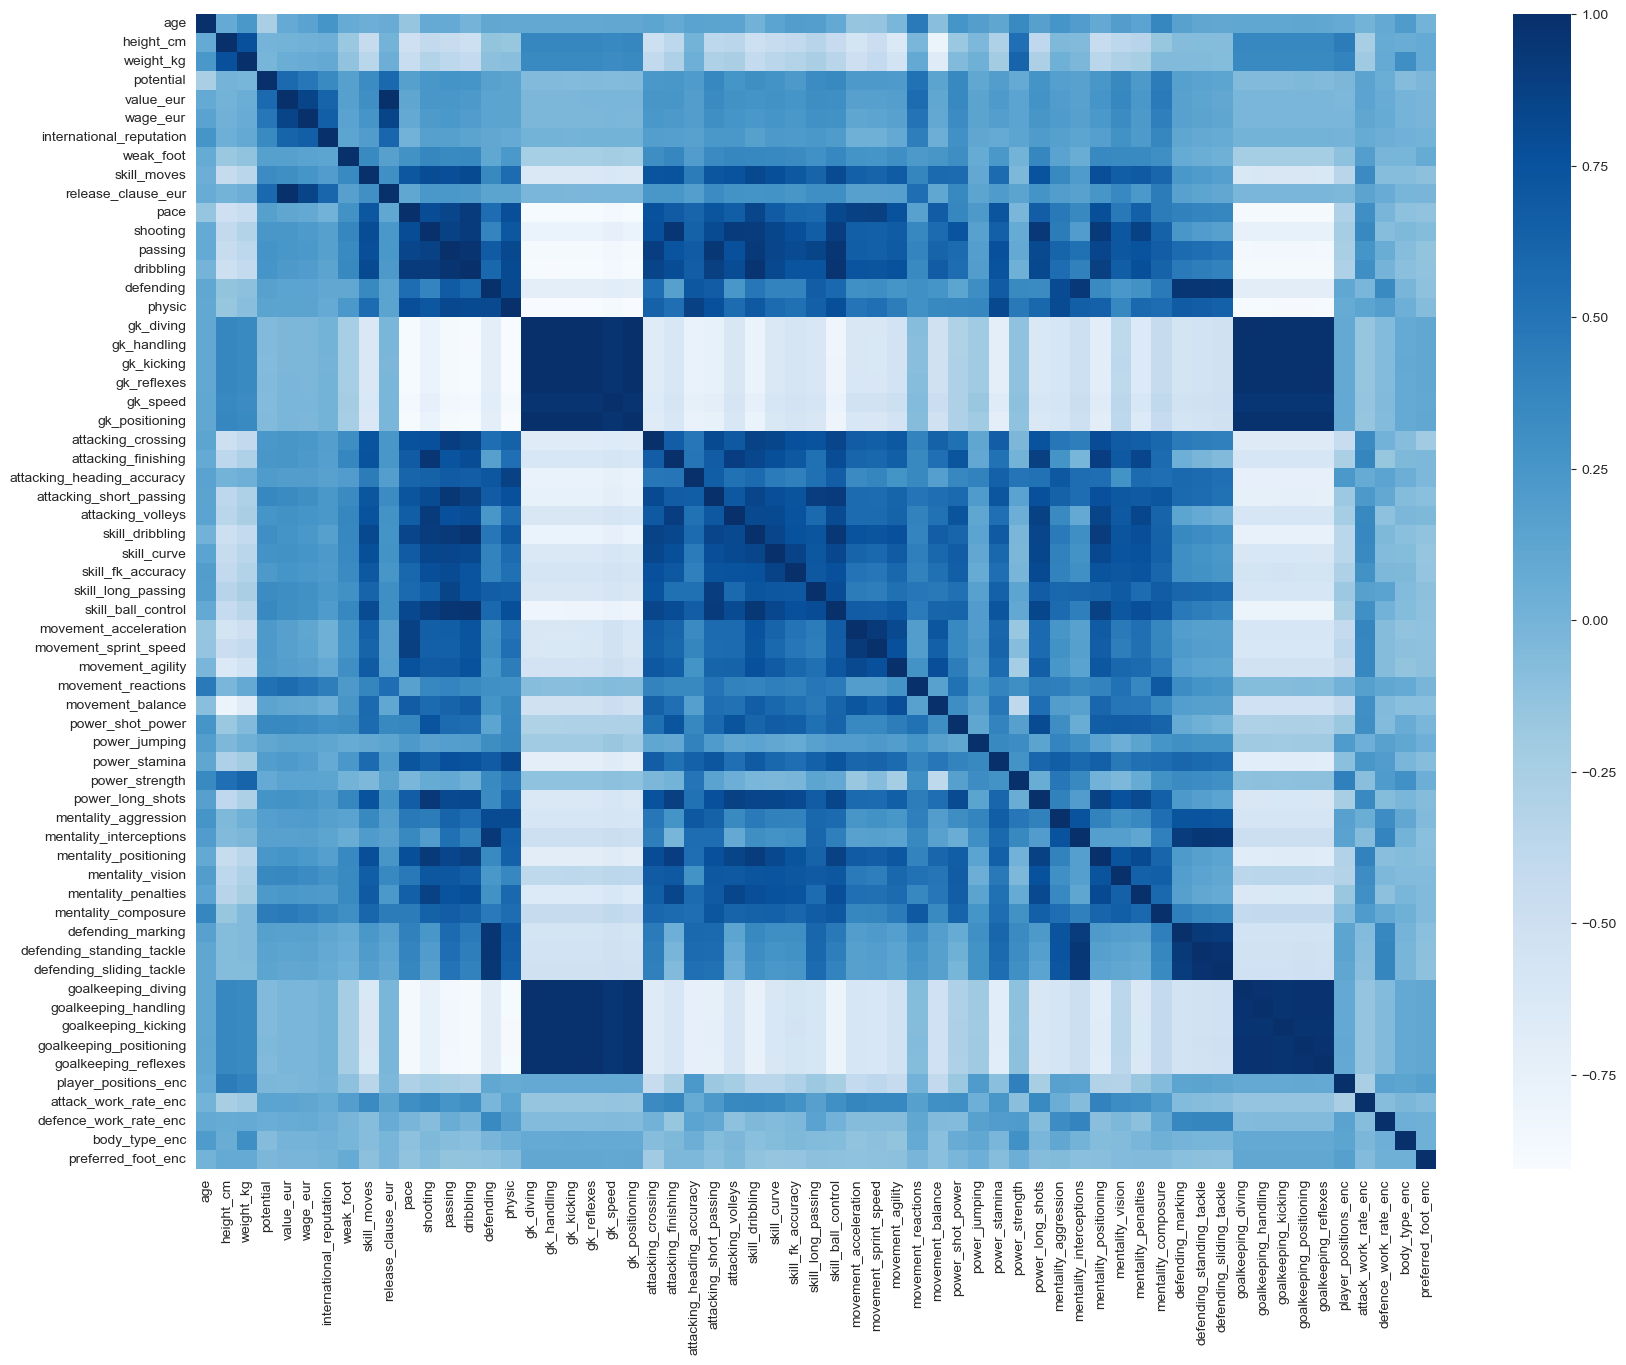

In [99]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),cmap="Blues")
plt.show()

In [101]:
with pd.option_context("display.max_rows",None):
    corr_mat = df.corr()
    corr_mat = corr_mat.abs().unstack()
    corr_mat = corr_mat.sort_values(ascending = False).drop_duplicates()
    corr_mat = corr_mat[corr_mat > 0.9]
    corr_mat = corr_mat [corr_mat < 1]
    corr_mat = corr_mat.reset_index()
    corr_mat.columns =  ['feature1','feature2','corr']
    print(corr_mat)

                     feature1                   feature2      corr
0                   gk_diving                gk_reflexes  0.998654
1              gk_positioning                gk_handling  0.997719
2                 gk_handling                  gk_diving  0.997603
3              gk_positioning                  gk_diving  0.997339
4              gk_positioning                gk_reflexes  0.997333
5                 gk_handling                gk_reflexes  0.997307
6                  gk_kicking                gk_handling  0.995905
7                  gk_kicking                  gk_diving  0.995724
8                 gk_reflexes                 gk_kicking  0.995461
9                  gk_kicking             gk_positioning  0.995219
10                  value_eur         release_clause_eur  0.993842
11       goalkeeping_reflexes                gk_reflexes  0.986475
12         goalkeeping_diving                  gk_diving  0.985601
13       goalkeeping_reflexes                  gk_diving  0.98

In [103]:
colinear_cols = list(set(corr_mat["feature2"]))
colinear_cols = sorted(colinear_cols)

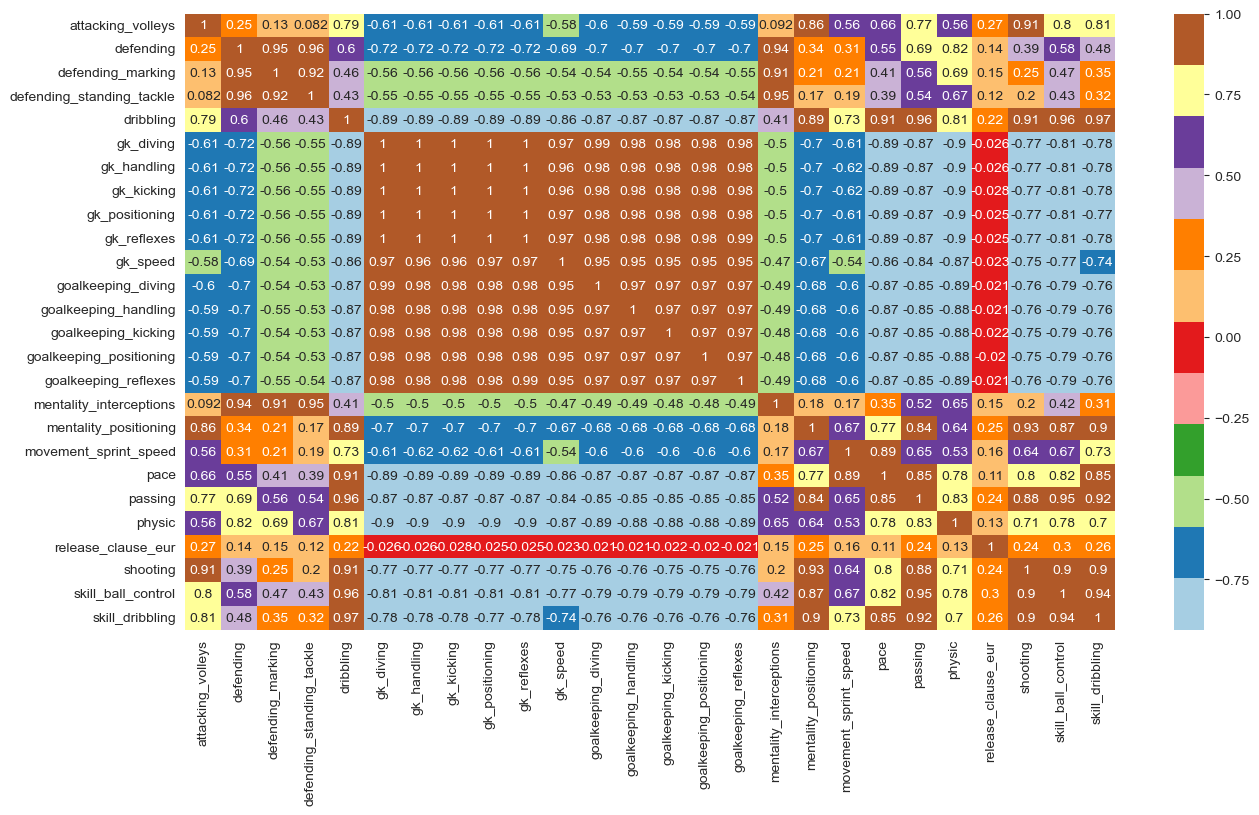

In [105]:
plt.figure(figsize=(15,8))
sns.heatmap(df[colinear_cols].corr(),cmap="Paired",annot=True)
plt.show()

### Insights
- **Initial Correlation Analysis**:
   - Generated a **heatmap (`Blues`)** to visualize overall feature relationships and identify high-correlation clusters.
- **Filtering Highly Correlated Features**:
   - Focused on **correlations > 0.9 and < 1** to detect multicollinearity.
   - Extracted key feature pairs contributing to **redundancy**.
- **Collinear Features Analysis**:
   - Created a refined heatmap for **collinear features** using **`Paired` colormap**.
   - Identified **interdependencies** within these features for better understanding.
- **Actionable Insight**:
   - Highlighted features for **potential removal or transformation** (e.g., **PCA**) to simplify models and enhance performance.

## Outlier Handling

In [107]:
for i in df.columns:
    print(i,len(df[i].value_counts()))

age 27
height_cm 49
weight_kg 56
potential 47
value_eur 214
wage_eur 141
international_reputation 5
weak_foot 5
skill_moves 5
release_clause_eur 1808
pace 71
shooting 80
passing 69
dribbling 72
defending 77
physic 62
gk_diving 48
gk_handling 48
gk_kicking 53
gk_reflexes 49
gk_speed 54
gk_positioning 51
attacking_crossing 88
attacking_finishing 93
attacking_heading_accuracy 89
attacking_short_passing 84
attacking_volleys 87
skill_dribbling 92
skill_curve 89
skill_fk_accuracy 89
skill_long_passing 85
skill_ball_control 90
movement_acceleration 86
movement_sprint_speed 86
movement_agility 83
movement_reactions 72
movement_balance 81
power_shot_power 80
power_jumping 74
power_stamina 86
power_strength 75
power_long_shots 90
mentality_aggression 87
mentality_interceptions 89
mentality_positioning 94
mentality_vision 85
mentality_penalties 86
mentality_composure 85
defending_marking 92
defending_standing_tackle 88
defending_sliding_tackle 88
goalkeeping_diving 73
goalkeeping_handling 71
goal

In [109]:
num_cols = []
for i in df.columns:
    if len(df[i].value_counts()) > 16 :
        num_cols.append(i)
len(num_cols)

53

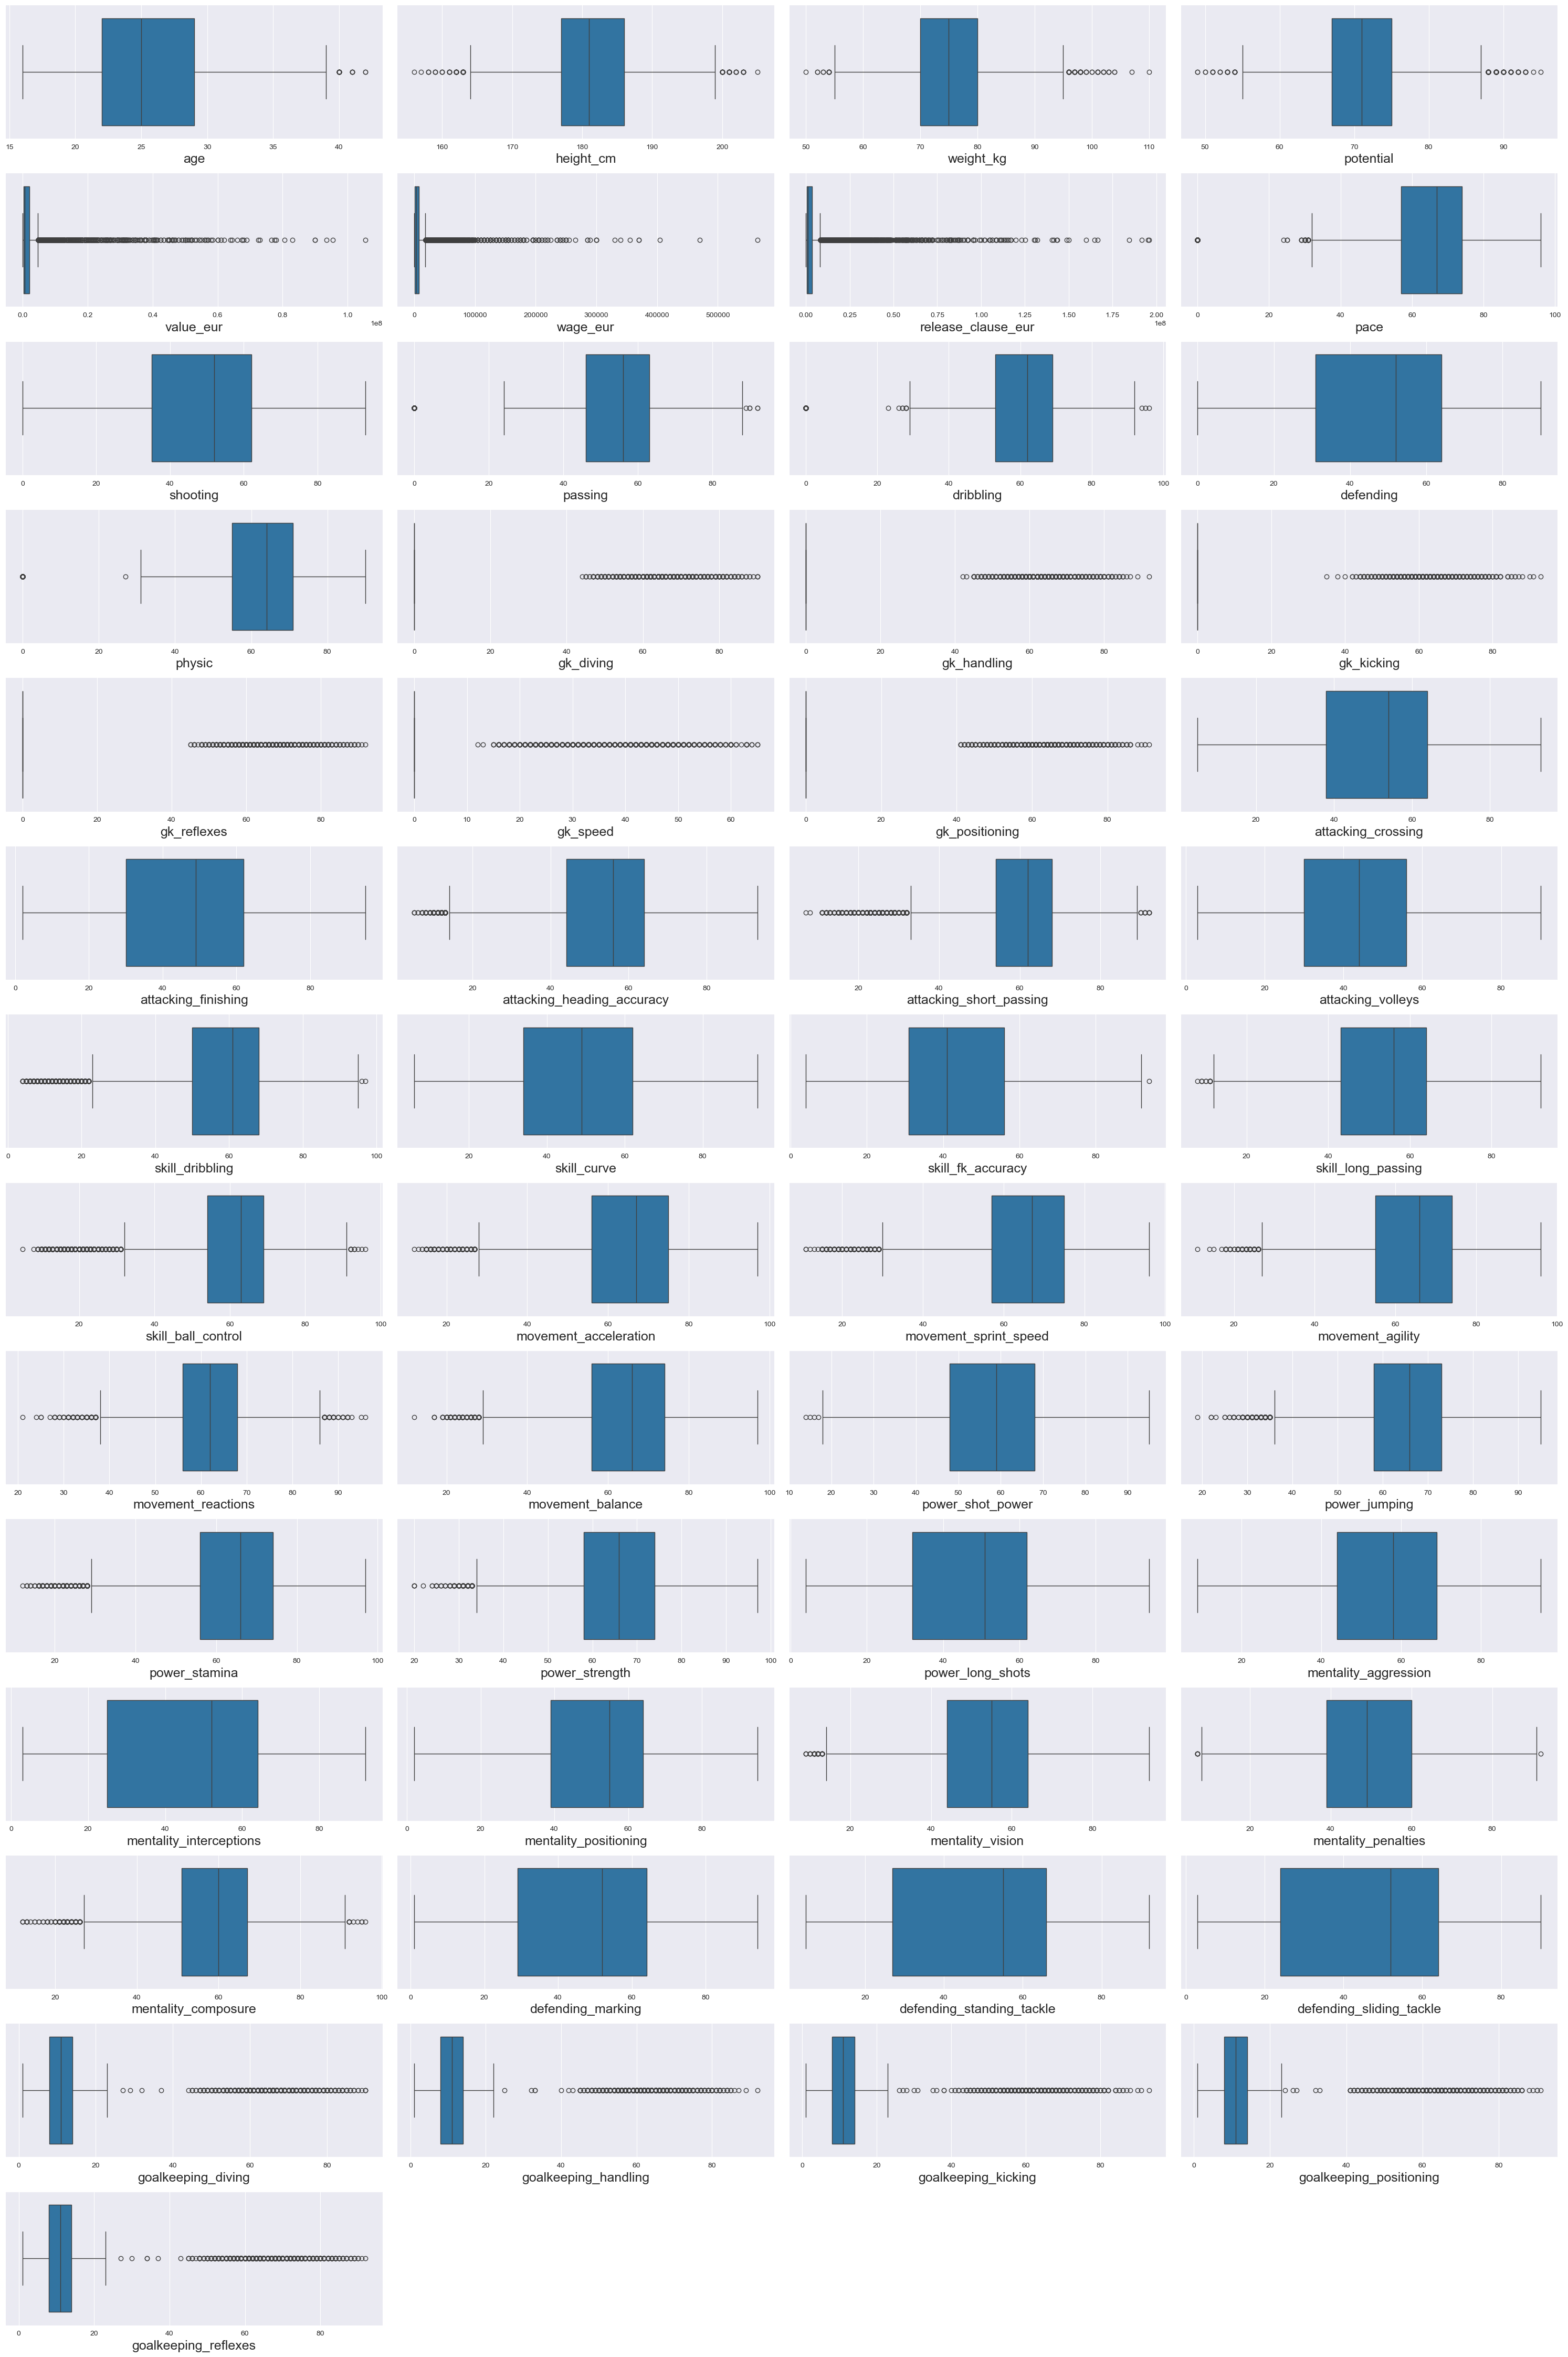

In [111]:
plt.figure(figsize=(30,45))
w = 1
for i in num_cols:
    plt.subplot(14,4,w)
    sns.boxplot(x=i, data=df)
    plt.xlabel(i, fontsize=18)
    w+=1
plt.tight_layout()

### Insights
- **Outliers in Financial Columns** (`release_clause_eur`, `value_eur`, `wage_eur`):
   - Extreme values: **Max** of **€105M**, **€565K**, and **€195M**; **Min** values of **€0**.
   - **Cause**: High-value players (top leagues or marketable players) create these outliers, while others have €0 values due to lower demand or relevance.
- **Outliers in Goalkeeper (GK) Columns**:
   - **Non-zero values** (about 2,000) cause outliers due to their relevance only for goalkeepers.
   - **Cause**: Non-goalkeeper players have 0 values, skewing the distribution of goalkeeping attributes.
- **Outliers in Goalkeeping Attributes** (`goalkeeping_diving`, `goalkeeping_handling`, etc.):
   - Higher ratings for goalkeepers, and lower or zero values for non-goalkeepers lead to outliers.
   - **Cause**: Goalkeepers contribute to high ratings, while non-goalkeepers distort the data.
- **Outliers in Skill, Power, and Mentality Attributes**:
   - Smaller outliers compared to GK columns.
   - **Cause**: Player-specific attributes, no zero values, compared to GK attributes with non-zero values only for goalkeepers.
- **No Outliers in Player and GK Ratings**:
   - All player and goalkeeper attributes are rated between **1 to 99**, so none of the columns are considered true outliers in terms of rating distribution.

## Scaling

In [113]:
cat_cols = []
for i in df.columns:
    if len(df[i].value_counts()) < 16 :
        cat_cols.append(i)
cat_cols

['international_reputation',
 'weak_foot',
 'skill_moves',
 'player_positions_enc',
 'attack_work_rate_enc',
 'defence_work_rate_enc',
 'body_type_enc',
 'preferred_foot_enc']

In [114]:
df[cat_cols] = df[cat_cols].astype("int")

In [115]:
df

age  height_cm  weight_kg  potential    value_eur  wage_eur  \
0      32.0      170.0       72.0       94.0   95500000.0  565000.0   
1      34.0      187.0       83.0       93.0   58500000.0  405000.0   
2      27.0      175.0       68.0       92.0  105500000.0  290000.0   
3      26.0      188.0       87.0       93.0   77500000.0  125000.0   
4      28.0      175.0       74.0       91.0   90000000.0  470000.0   
...     ...        ...        ...        ...          ...       ...   
18273  22.0      186.0       79.0       56.0      40000.0    2000.0   
18274  22.0      177.0       66.0       56.0      40000.0    2000.0   
18275  19.0      186.0       75.0       56.0      40000.0    1000.0   
18276  18.0      185.0       74.0       54.0      40000.0    1000.0   
18277  26.0      182.0       78.0       51.0      40000.0    2000.0   

       international_reputation  weak_foot  skill_moves  release_clause_eur  \
0                             5          4            4         195800000.0   
1                             5          4            5          96500000.0   
2                             5          5            5         195200000.0   
3                             3          3            1         164700000.0   
4                             4          4            4         184500000.0   
...                         ...        ...          ...                 ...   
18273                         1          3            2             70000.0   
18274                         1          2            2             72000.0   
18275                         1          2            2             70000.0   
18276                         1          2            2             70000.0   
18277                         1          3            2             68400.0   

       pace  shooting  passing  dribbling  defending  physic  gk_diving  \
0      87.0      92.0     92.0       96.0       39.0    66.0        0.0   
1      90.0      93.0     82.0       89.0       35.0    78.0        0.0   
2      91.0      85.0     87.0       95.0       32.0    58.0        0.0   
3       0.0       0.0      0.0        0.0        0.0     0.0       87.0   
4      91.0      83.0     86.0       94.0       35.0    66.0        0.0   
...     ...       ...      ...        ...        ...     ...        ...   
18273  57.0      23.0     28.0       33.0       47.0    51.0        0.0   
18274  58.0      24.0     33.0       35.0       48.0    48.0        0.0   
18275  54.0      35.0     44.0       45.0       48.0    51.0        0.0   
18276  59.0      35.0     47.0       47.0       45.0    52.0        0.0   
18277  60.0      32.0     51.0       45.0       47.0    55.0        0.0   

       gk_handling  gk_kicking  gk_reflexes  gk_speed  gk_positioning  \
0              0.0         0.0          0.0       0.0             0.0   
1              0.0         0.0          0.0       0.0             0.0   
2              0.0         0.0          0.0       0.0             0.0   
3             92.0        78.0         89.0      52.0            90.0   
4              0.0         0.0          0.0       0.0             0.0   
...            ...         ...          ...       ...             ...   
18273          0.0         0.0          0.0       0.0             0.0   
18274          0.0         0.0          0.0       0.0             0.0   
18275          0.0         0.0          0.0       0.0             0.0   
18276          0.0         0.0          0.0       0.0             0.0   
18277          0.0         0.0          0.0       0.0             0.0   

       attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0                    88.0                 95.0                        70.0   
1                    84.0                 94.0                        89.0   
2                    87.0                 87.0                        62.0   
3                    13.0                 11.0                        15.0   
4                    81.0             

In [120]:
mms = MinMaxScaler()
mms

MinMaxScaler()

In [122]:
df[num_cols] = mms.fit_transform(df[num_cols])

In [124]:
df.head()

age  height_cm  weight_kg  potential  value_eur  wage_eur  \
0  0.615385   0.285714   0.366667   0.978261   0.905213  1.000000   
1  0.692308   0.632653   0.550000   0.956522   0.554502  0.716814   
2  0.423077   0.387755   0.300000   0.934783   1.000000  0.513274   
3  0.384615   0.653061   0.616667   0.956522   0.734597  0.221239   
4  0.461538   0.387755   0.400000   0.913043   0.853081  0.831858   

   international_reputation  weak_foot  skill_moves  release_clause_eur  \
0                         5          4            4            1.000000   
1                         5          4            5            0.492816   
2                         5          5            5            0.996935   
3                         3          3            1            0.841154   
4                         4          4            4            0.942284   

       pace  shooting   passing  dribbling  defending    physic  gk_diving  \
0  0.906250  0.989247  1.000000   1.000000   0.433333  0.733333   0.000000   
1  0.937500  1.000000  0.891304   0.927083   0.388889  0.866667   0.000000   
2  0.947917  0.913978  0.945652   0.989583   0.355556  0.644444   0.000000   
3  0.000000  0.000000  0.000000   0.000000   0.000000  0.000000   0.966667   
4  0.947917  0.892473  0.934783   0.979167   0.388889  0.733333   0.000000   

   gk_handling  gk_kicking  gk_reflexes  gk_speed  gk_positioning  \
0          0.0     0.00000     0.000000       0.0        0.000000   
1          0.0     0.00000     0.000000       0.0        0.000000   
2          0.0     0.00000     0.000000       0.0        0.000000   
3          1.0     0.83871     0.967391       0.8        0.989011   
4          0.0     0.00000     0.000000       0.0        0.000000   

   attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0            0.943182             1.000000                    0.738636   
1            0.897727             0.989247                    0.954545   
2            0.931818             0.913978                    0.647727   
3            0.090909             0.096774                    0.113636   
4            0.863636             0.881720                    0.636364   

   attacking_short_passing  attacking_volleys  skill_dribbling  skill_curve  \
0                 1.000000           0.977011         1.000000     0.988636   
1                 0.894118           0.965517         0.913978     0.852273   
2                 0.941176           0.965517         0.989247     0.931818   
3                 0.423529           0.114943         0.086022     0.079545   
4                 0.964706           0.919540         0.978495     0.875000   

   skill_fk_accuracy  skill_long_passing  skill_ball_control  \
0           1.000000            1.000000            1.000000   
1           0.800000            0.821429            0.956044   
2           0.922222            0.869048            0.989011   
3           0.111111            0.380952            0.274725   
4           0.833333            0.892857            0.978022   

   movement_acceleration  movement_sprint_speed  movement_agility  \
0               0.929412               0.858824          0.964706   
1               0.905882               0.941176          0.894118   
2               0.964706               0.917647          1.000000   
3               0.364706               0.576471          0.658824   
4               0.964706               0.905882          0.988235   

   movement_reactions  movement_balance  power_shot_power  power_jumping  \
0            0.986667          0.976471          0.888889       0.644737   
1            1.000000          0.694118          1.000000       1.000000   
2            0.946667          0.847059          0.814815       0.552632   
3            0.893333          0.435294          0.555556       0.776316   
4            0.920000          0.964706          0.839506       0.486842   

   power_stamina  power_strength  power_long_shots  mentality_aggression  \
0    

### Insights

- **Purpose**: Min-Max Scaling standardizes numerical features to a common range of [0, 1], ensuring uniformity.
- **Reason for Scaling**: Columns like **age**, **height_cm**, **weight_kg**, **value_eur**, **wage_eur**, and **release_clause_eur** had different ranges, which could bias the model. Player and goalkeeper attributes (1-99 range) were scaled for consistency.
- **Why Min-Max Scaling**: I used Min-Max scaling for these columns to normalize them to the same range, making sure no feature disproportionately influences the model due to differing scales.
- **Impact**: Ensures all features contribute equally to the model, preventing larger magnitude features from dominating.
- **Outcome**: After scaling, models can now process all features effectively, improving model accuracy and performance by ensuring uniform feature contribution.

## Dimensionality Reduction

### Principal Component Analysis

In [126]:
pca = PCA(random_state=42)
pca

PCA(random_state=42)

In [128]:
pca.fit_transform(df)

pca.explained_variance_ratio_

evr_sum = np.cumsum(pca.explained_variance_ratio_)

print(evr_sum)

print(pca.n_components_)

[0.73748541 0.84336355 0.8737456  0.89673638 0.91796225 0.93364867
 0.94723163 0.95876606 0.96815715 0.97478466 0.97981964 0.98354101
 0.98625593 0.98829933 0.98944902 0.99038029 0.99115855 0.99190589
 0.99254204 0.99314293 0.99369774 0.99414124 0.99458171 0.9949995
 0.99536809 0.99571855 0.99605441 0.99637398 0.99667711 0.99696509
 0.99724779 0.99751507 0.99776762 0.9980025  0.99822276 0.99841848
 0.9986049  0.99878219 0.998947   0.99910388 0.9992432  0.99937014
 0.9994594  0.99954331 0.99962244 0.99969835 0.9997688  0.99983789
 0.99989508 0.99991823 0.99993753 0.99995391 0.99996546 0.99997461
 0.99998163 0.99998771 0.99999199 0.99999598 0.99999856 0.99999967
 1.        ]
61


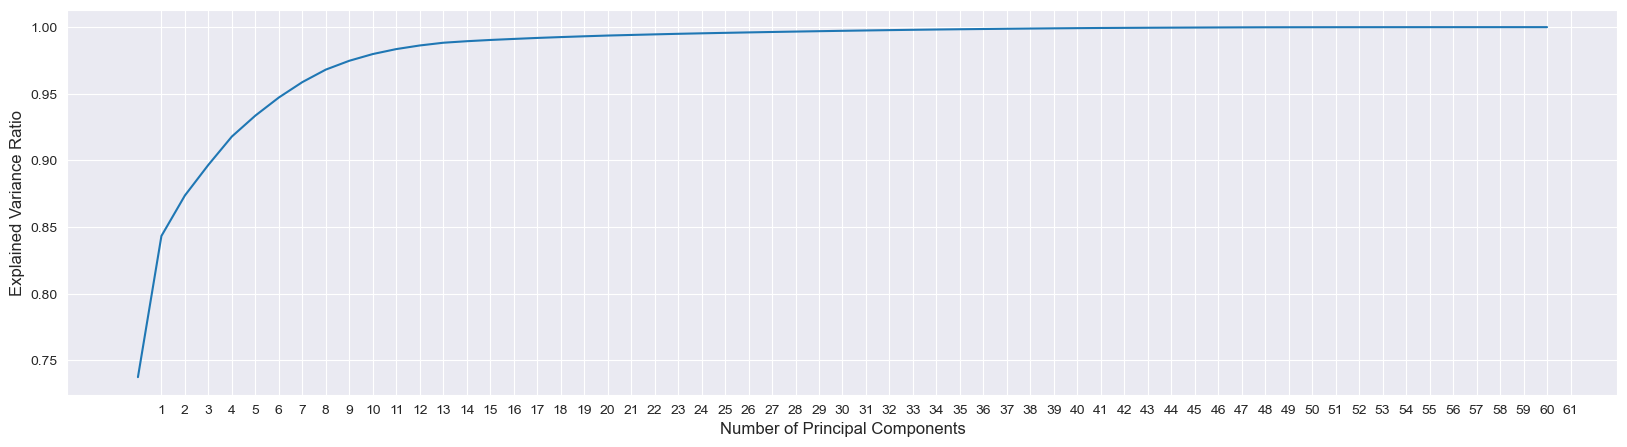

In [130]:
plt.figure(figsize=(20,5))
plt.plot(evr_sum)
plt.xlabel("Number of Principal Components", fontsize = 12)
plt.ylabel("Explained Variance Ratio", fontsize = 12)
plt.xticks(range(1,62))
plt.show()

In [132]:
pca = PCA(n_components=2,random_state=42)
final_df = pd.DataFrame(pca.fit_transform(df), columns=["pca1","pca2"])
final_df.head()

pca1      pca2
0 -7.467969  1.717259
1  2.322391  3.341943
2 -6.590850  2.505712
3  1.171891 -3.024957
4 -6.462904  1.745065

### Insights

- **PCA Summary**:
   - For **n_components = 2**, the explained variance ratio is **0.843** (~84%).
   - For **n_components = 3**, the explained variance ratio increases to **0.87** (~87%).
- **Reason for Choosing n_components = 2**:
   - I chose **n_components = 2** because it explains about **84%** of the variance, which is a good balance between simplicity and coverage of the data variance.
   - By limiting the number of components to 2, the model retains most of the important information while reducing dimensionality.
- **Avoiding Noise**:
   - Adding more components could lead to capturing less significant variations (i.e., noise) in the data, which could negatively affect the model's performance.
   - **More components** may include redundant or irrelevant data, increasing the risk of overfitting and introducing noise, which could affect the predictive power of the model.
- **Outcome**: 
   - By selecting **2 components**, the model reduces dimensionality while covering **84% of the information**, improving computational efficiency and ensuring meaningful variance retention.

## Model Implementation 

### K_Means

In [134]:
kmeans = KMeans()
kmeans

KMeans()

In [136]:
kmeans.fit(final_df)

labels = kmeans.labels_

print(f"silhouette_score ------ {silhouette_score(final_df,labels)}")

print(f"WCSS ------------------ {kmeans.inertia_}")

print(f"davies_bouldin_score -- {davies_bouldin_score(final_df,labels)}")

silhouette_score ------ 0.5458791840980636
WCSS ------------------ 8632.880642657092
davies_bouldin_score -- 0.7224890143147035


### K-Medoids

In [137]:
kmedoids = KMedoids()
kmedoids

KMedoids()

In [140]:
kmedoids.fit(final_df)

label = kmedoids.predict(final_df)

print(f"silhouette_score ------ {silhouette_score(final_df,labels)}")

print(f"WCSS ------------------ {kmedoids.inertia_}")

print(f"davies_bouldin_score -- {davies_bouldin_score(final_df,labels)}")

silhouette_score ------ 0.5458791840980636
WCSS ------------------ 11901.339871410504
davies_bouldin_score -- 0.7224890143147035


## Hierarchical clustering

In [141]:
distance = pdist(final_df)

dist_mat = squareform(distance)

link_mat = linkage(final_df)

labels = fcluster(link_mat, t=3,criterion='maxclust')

print(f"silhouette_score ------ {silhouette_score(final_df,labels)}")

print(f"davies_bouldin_score -- {davies_bouldin_score(final_df,labels)}")


silhouette_score ------ 0.6030609586996127
davies_bouldin_score -- 0.47154533946591676


### Gaussian Mixture 

In [142]:
gm = GaussianMixture(n_components=3)
gm

GaussianMixture(n_components=3)

In [143]:
gm.fit(final_df)

labels = gm.predict(final_df)

print(f"silhouette_score ------ {silhouette_score(final_df,labels)}")

print(f"davies_bouldin_score -- {davies_bouldin_score(final_df,labels)}")

silhouette_score ------ 0.5869824068798412
davies_bouldin_score -- 0.4906046333884401


### Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

In [145]:
dbscan = DBSCAN()
dbscan

DBSCAN()

In [146]:
dbscan.fit_predict(final_df)

labels = dbscan.labels_

print(f"silhouette_score ------ {silhouette_score(final_df,labels)}")

print(f"davies_bouldin_score -- {davies_bouldin_score(final_df,labels)}")

silhouette_score ------ 0.5479561101509143
davies_bouldin_score -- 0.9087453311390714


### Ordering Points To Identify the Clustering Structure (OPTICS)

In [147]:
optics = OPTICS()
optics

OPTICS()

In [148]:
labels = optics.fit_predict(final_df)

print(f"silhouette_score ------ {silhouette_score(final_df,labels)}")

print(f"davies_bouldin_score -- {davies_bouldin_score(final_df,labels)}")

silhouette_score ------ -0.24506510148417163
davies_bouldin_score -- 1.6559676717072773


### MeanShift 

In [149]:
mean_shift = MeanShift()
mean_shift

MeanShift()

In [150]:
labels = mean_shift.fit_predict(final_df)

print(f"silhouette_score ------ {silhouette_score(final_df,labels)}")

print(f"davies_bouldin_score -- {davies_bouldin_score(final_df,labels)}")

silhouette_score ------ 0.5667728287784818
davies_bouldin_score -- 0.5117183426011556


### Insights

### Hyperparameter Tuning

In [153]:
results = []

param_grid = {
    'eps': [0.1, 0.2, 0.5, 1.0, 2.0],
    'min_samples': [3, 5, 7, 10]}

for params in ParameterGrid(param_grid):
    eps = params["eps"]
    min_samples = params["min_samples"]
    dbscan = DBSCAN(eps = eps, min_samples= min_samples, n_jobs=-1)
    labels = dbscan.fit_predict(final_df)

    if len(set(labels)) > 1:
        score = silhouette_score(final_df,labels)
    else:
        score = -1

    results.append({"eps":eps, "min_samples":min_samples, 'silhouette_score': score})

In [158]:
best_params = max(results, key=lambda x: x['silhouette_score'])
print(f"Best params: eps={best_params['eps']}, min_samples={best_params['min_samples']}, silhouette_score={best_params['silhouette_score']}")

Best params: eps=1.0, min_samples=3, silhouette_score=0.6030609586996127


## Retrain and Re-evaluation

### K-Means

In [159]:
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(final_df)
    wcss.append(model.inertia_)

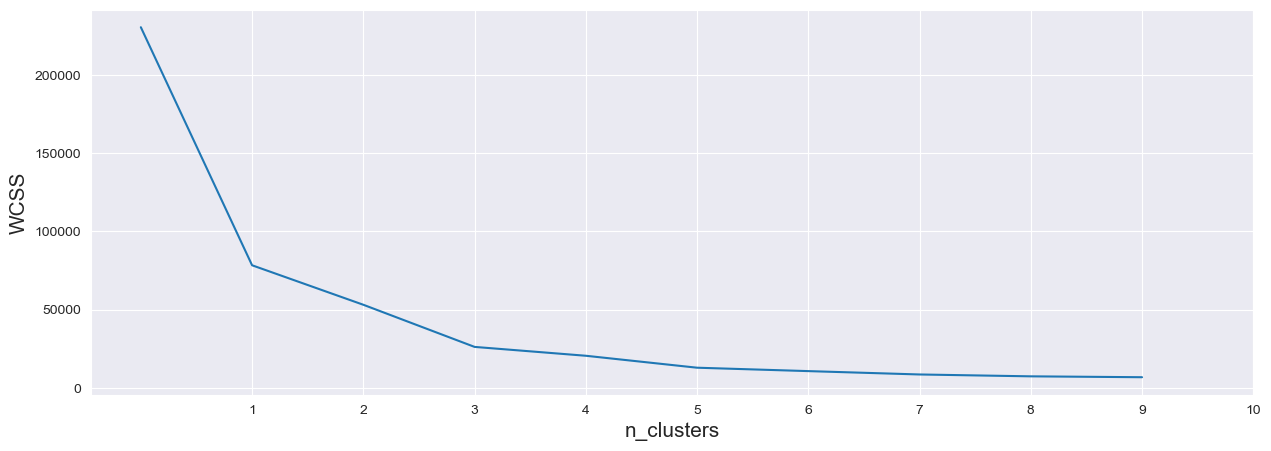

In [160]:
plt.figure(figsize=(15,5))
ticks = range(1,11)
plt.plot(wcss)
plt.xlabel("n_clusters",fontsize = 15)
plt.xticks(ticks=ticks)
plt.ylabel("WCSS",fontsize = 15)
plt.show()

In [161]:
kmeans = KMeans(n_clusters=3,random_state=42,init='k-means++')
kmeans

KMeans(n_clusters=3, random_state=42)

In [162]:
kmeans.fit(final_df)

labels_kmeans = kmeans.labels_

### Model Evaluation 

In [163]:
print(f"silhouette_score ------ {silhouette_score(final_df,labels_kmeans)}")

print(f"WCSS ------------------ {kmeans.inertia_}")

print(f"davies_bouldin_score -- {davies_bouldin_score(final_df,labels_kmeans)}")

silhouette_score ------ 0.5917314220630714
WCSS ------------------ 53152.35824469485
davies_bouldin_score -- 0.46691500417918236


In [164]:
silhouette_kmeans     = silhouette_score(final_df,labels_kmeans)
davies_bouldin_kmeans = davies_bouldin_score(final_df,labels_kmeans)

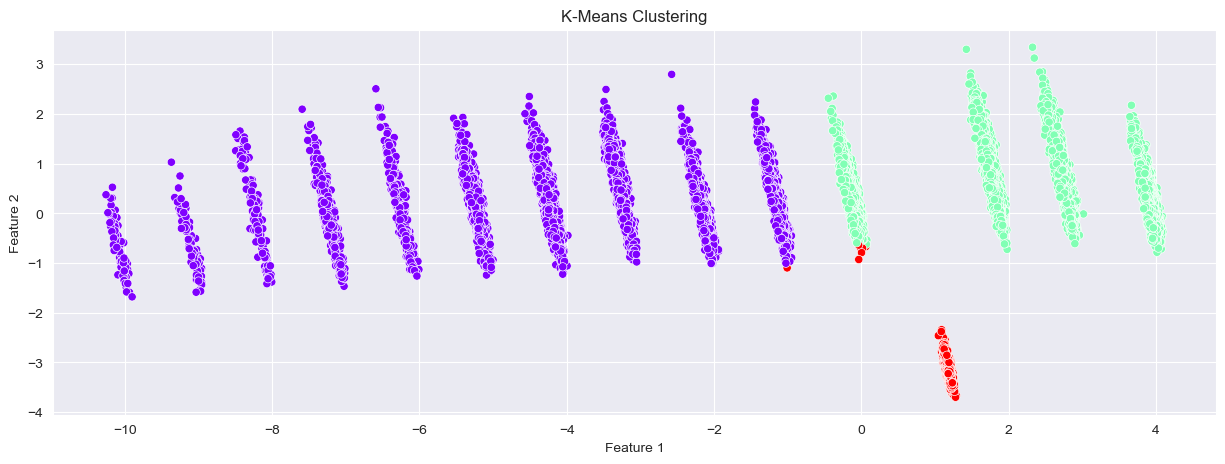

In [165]:
plt.figure(figsize=(15,5))
sns.scatterplot(x = final_df.iloc[:, 0], y = final_df.iloc[:, 1],c= labels_kmeans ,cmap='rainbow')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### K-Medoids

In [167]:
wcss = []
for i in range(1,11):
    model = KMedoids(n_clusters=i, random_state=42)
    model.fit(final_df)
    wcss.append(model.inertia_)

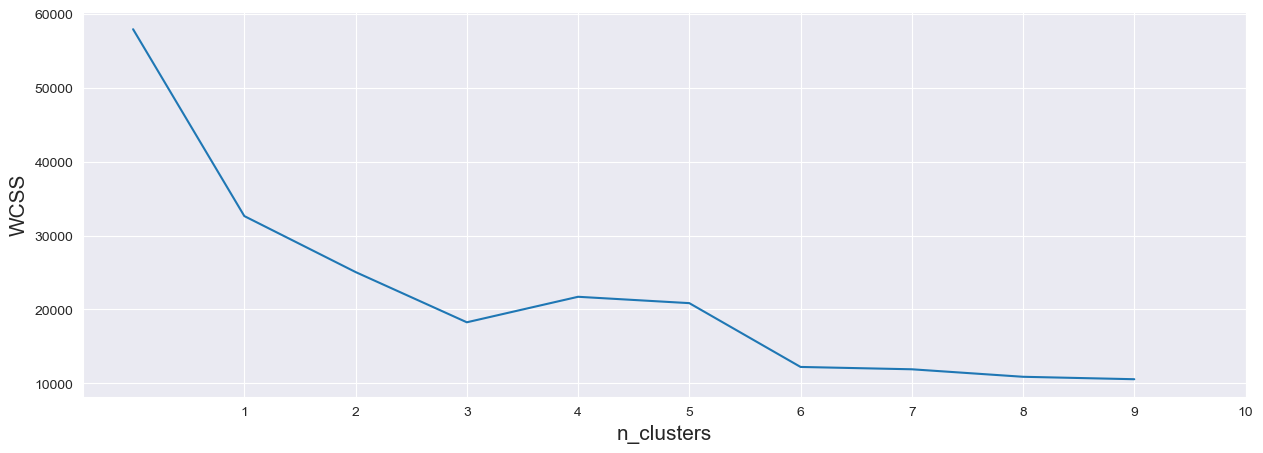

In [168]:
plt.figure(figsize=(15,5))
ticks = range(1,11)
plt.plot(wcss)
plt.xlabel("n_clusters",fontsize = 15)
plt.xticks(ticks=ticks)
plt.ylabel("WCSS",fontsize = 15)
plt.show()

In [169]:
kmedoids = KMedoids(n_clusters=3,random_state=42)
kmedoids

KMedoids(n_clusters=3, random_state=42)

In [170]:
kmedoids.fit(final_df)

labels_medoid = kmedoids.predict(final_df)

### Model Evaluation 

In [174]:
print(f"silhouette_score ------ {silhouette_score(final_df,labels_medoid)}")

print(f"WCSS ------------------ {kmedoids.inertia_}")

print(f"davies_bouldin_score -- {davies_bouldin_score(final_df,labels_medoid)}")

silhouette_score ------ 0.5898892632657843
WCSS ------------------ 25057.751082437262
davies_bouldin_score -- 0.4694828118310644


In [175]:
silhouette_medoid     = silhouette_score(final_df,labels_medoid)
davies_bouldin_medoid = davies_bouldin_score(final_df,labels_medoid)

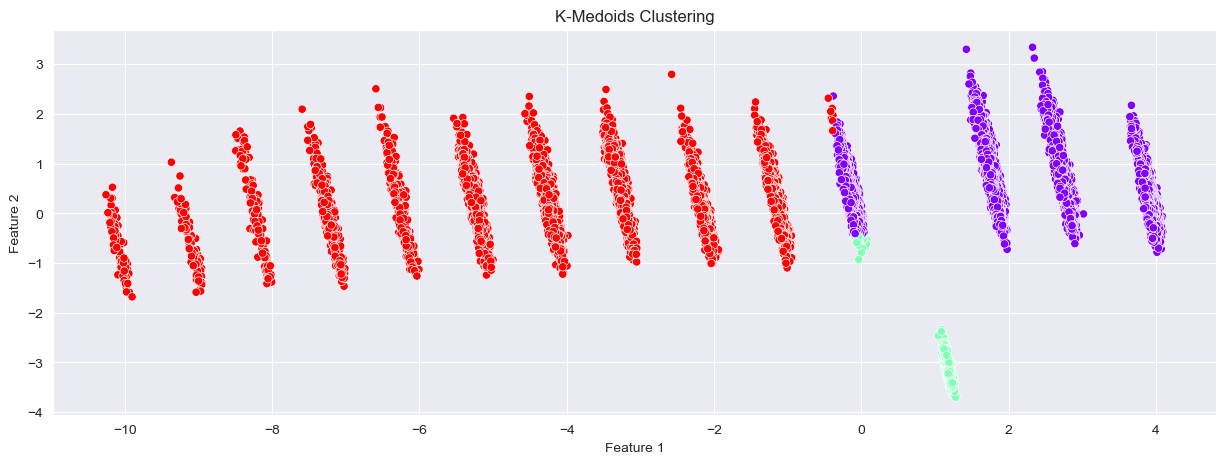

In [176]:
plt.figure(figsize=(15,5))
sns.scatterplot(x = final_df.iloc[:, 0], y = final_df.iloc[:, 1],c= labels_medoid ,cmap='rainbow')
plt.title("K-Medoids Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Hierarchical clustering

In [178]:
distance = pdist(final_df,metric="euclidean")

dist_mat = squareform(distance)

link_mat = linkage(final_df,method="ward")

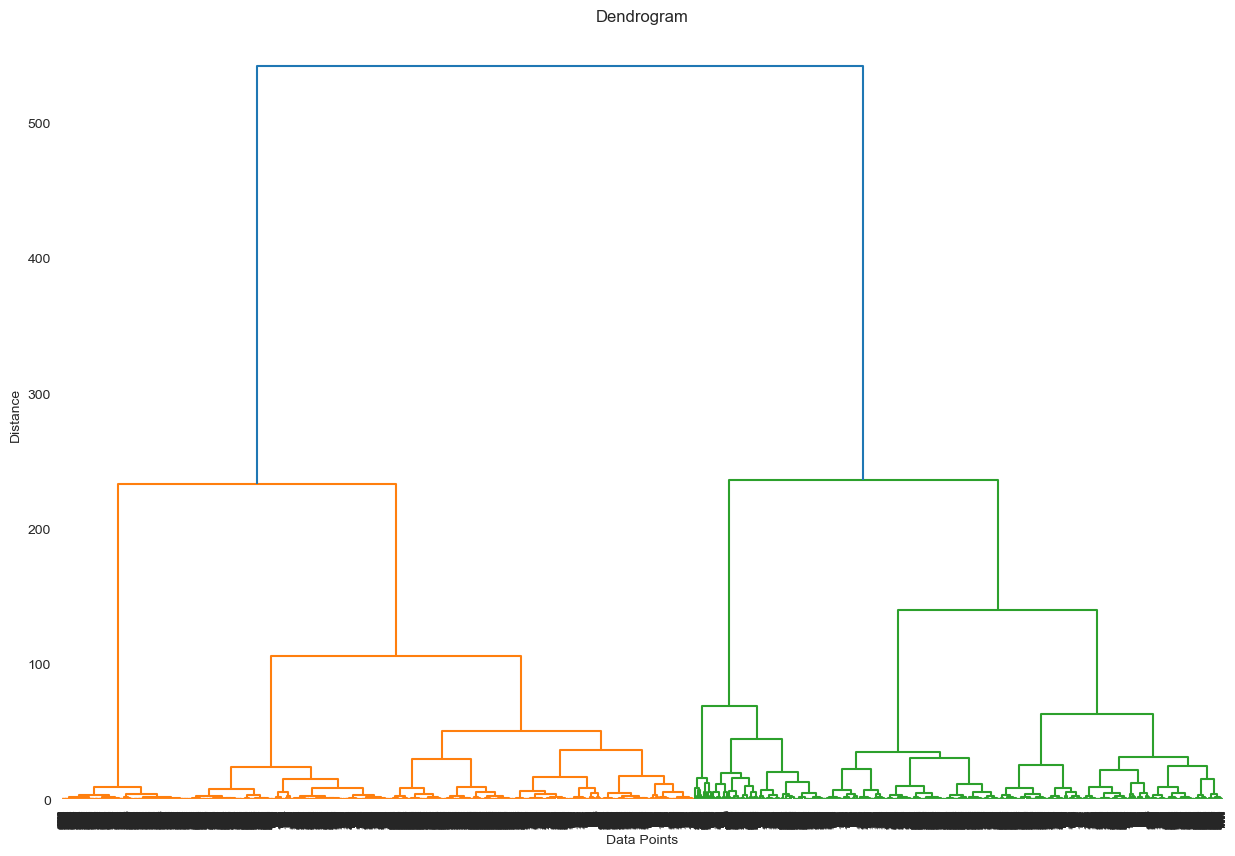

In [179]:
plt.figure(figsize=(15, 10))
dendrogram(link_mat)
plt.title("Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [180]:
labels_hier = fcluster(link_mat, t=4,criterion='maxclust')

### Model Evaluation 

In [182]:
print(f"silhouette_score ------ {silhouette_score(final_df,labels_hier)}")

print(f"davies_bouldin_score -- {davies_bouldin_score(final_df,labels_hier)}")

silhouette_score ------ 0.6004935479778635
davies_bouldin_score -- 0.522610535827441


In [183]:
silhouette_hier     = silhouette_score(final_df,labels_hier)
davies_bouldin_hier = davies_bouldin_score(final_df,labels_hier)

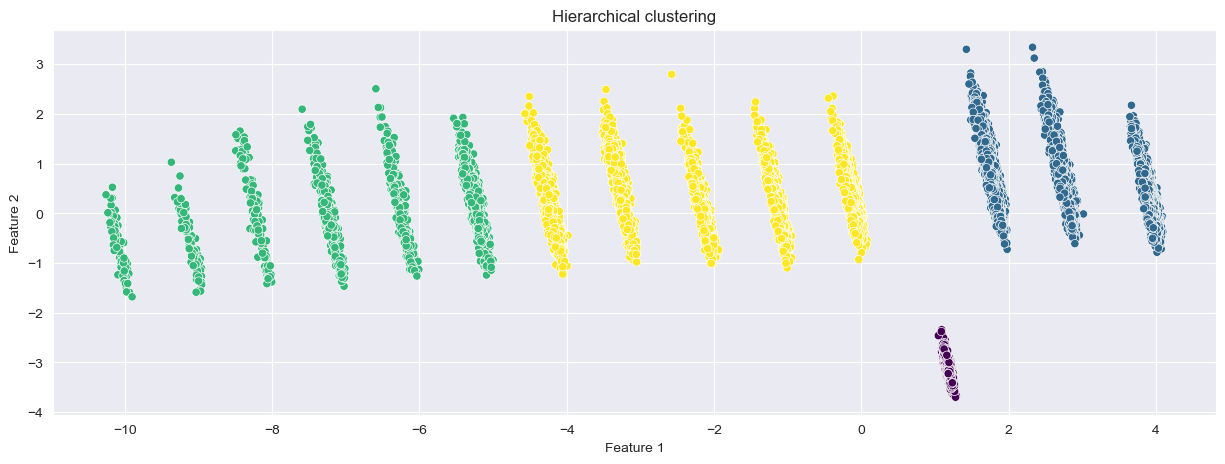

In [184]:
plt.figure(figsize=(15,5))
sns.scatterplot(x = final_df.iloc[:, 0], y = final_df.iloc[:, 1],c= labels_hier ,cmap="viridis")
plt.title("Hierarchical clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Gaussian Mixture 

In [186]:
gm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
gm

GaussianMixture(n_components=4, random_state=42)

In [187]:
gm.fit(final_df)

labels_gm = gm.predict(final_df)

### Model Evaluation 

In [189]:
print(f"silhouette_score ------ {silhouette_score(final_df,labels_gm)}")

print(f"davies_bouldin_score -- {davies_bouldin_score(final_df,labels_gm)}")

silhouette_score ------ 0.6000746463018151
davies_bouldin_score -- 0.5177108505165244


In [190]:
silhouette_gm     = silhouette_score(final_df,labels_gm)
davies_bouldin_gm = davies_bouldin_score(final_df,labels_gm)

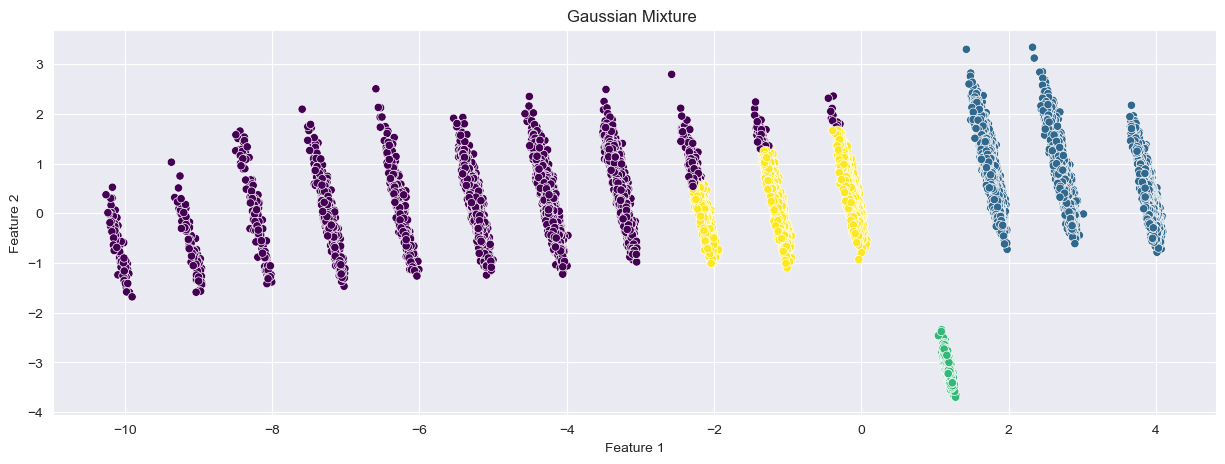

In [191]:
plt.figure(figsize=(15,5))
sns.scatterplot(x = final_df.iloc[:, 0], y = final_df.iloc[:, 1],c= labels_gm ,cmap='viridis')
plt.title("Gaussian Mixture ")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

In [193]:
dbscan = DBSCAN(eps = 1, min_samples= 3, n_jobs= -1)
dbscan

DBSCAN(eps=1, min_samples=3, n_jobs=-1)

In [194]:
dbscan.fit_predict(final_df)

labels_dbscan = dbscan.labels_

### Model Evaluation 

In [196]:
print(f"silhouette_score ------ {silhouette_score(final_df,labels_dbscan)}")

print(f"davies_bouldin_score -- {davies_bouldin_score(final_df,labels_dbscan)}")

silhouette_score ------ 0.6030609586996127
davies_bouldin_score -- 0.47154533946591676


In [197]:
silhouette_dbscan      = silhouette_score(final_df,labels_dbscan)
davies_bouldin_dbscan = davies_bouldin_score(final_df,labels_dbscan)

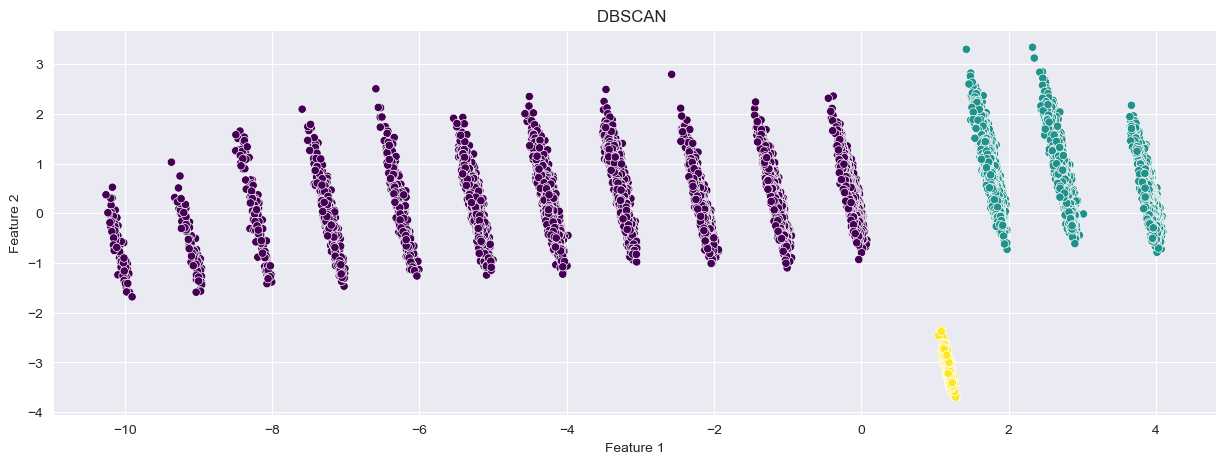

In [198]:
plt.figure(figsize=(15,5))
sns.scatterplot(x = final_df.iloc[:, 0], y = final_df.iloc[:, 1],c= labels_dbscan ,cmap='viridis')
plt.title("DBSCAN ")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Ordering Points To Identify the Clustering Structure (OPTICS)

In [200]:
optics = OPTICS(metric='manhattan',min_samples=15, xi=0.3, min_cluster_size=0.2)
optics

OPTICS(metric='manhattan', min_cluster_size=0.2, min_samples=15, xi=0.3)

In [201]:
optics.fit(final_df)

labels_optics = optics.labels_

### Model Evaluation

In [209]:
print(f"silhouette_score ------ {silhouette_score(final_df,labels_optics)}")

print(f"davies_bouldin_score -- {davies_bouldin_score(final_df,labels_optics)}")

silhouette_score ------ 0.6030609586996127
davies_bouldin_score -- 0.47154533946591676


In [210]:
silhouette_optics     = silhouette_score(final_df,labels_optics)
davies_bouldin_optics = davies_bouldin_score(final_df,labels_optics)

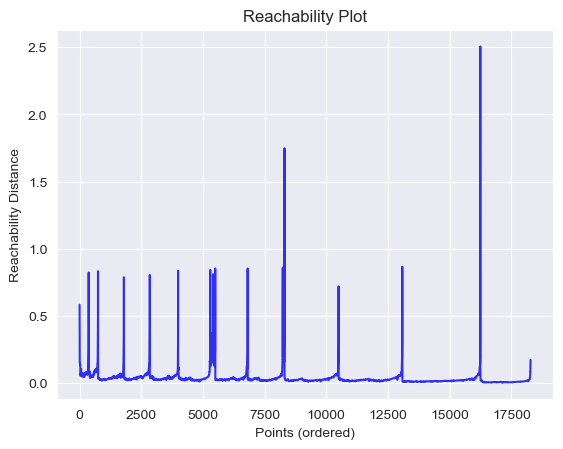

In [213]:
reachability = optics.reachability_[optics.ordering_]
plt.plot(np.arange(len(reachability)), reachability, 'b-', alpha=0.8)
plt.title('Reachability Plot')
plt.xlabel('Points (ordered)')
plt.ylabel('Reachability Distance')
plt.show()

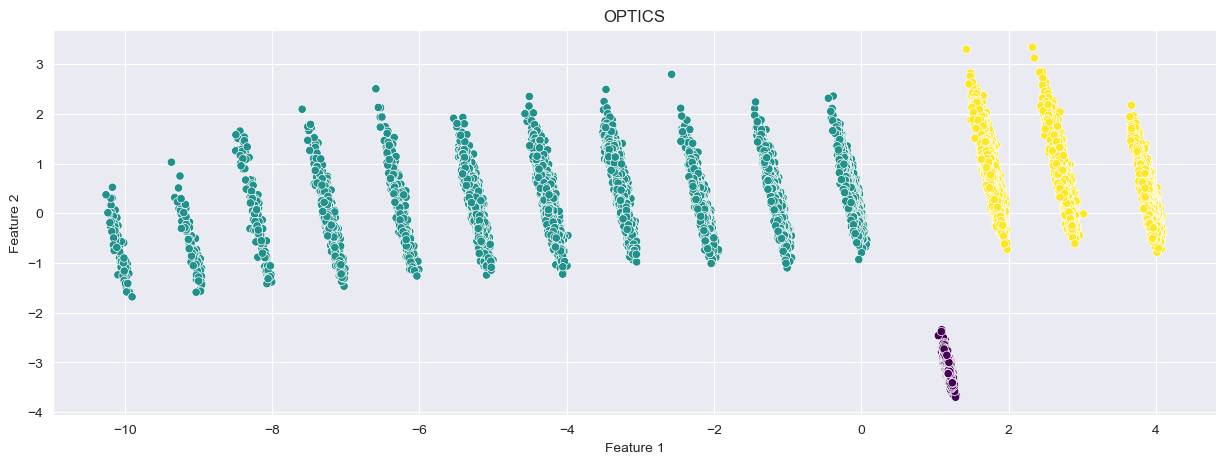

In [215]:
plt.figure(figsize=(15,5))
sns.scatterplot(x = final_df.iloc[:, 0], y = final_df.iloc[:, 1],c= labels_optics ,cmap='viridis')
plt.title("OPTICS")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Mean Shift

In [217]:
mean_shift = MeanShift(bandwidth=2.0)
mean_shift

MeanShift(bandwidth=2.0)

In [218]:
labels_shift = mean_shift.fit_predict(final_df)

### Model Evaluation

In [220]:
print(f"silhouette_score ------ {silhouette_score(final_df,labels_shift)}")

print(f"davies_bouldin_score -- {davies_bouldin_score(final_df,labels_shift)}")

silhouette_score ------ 0.6215093980092661
davies_bouldin_score -- 0.5008600945466661


In [221]:
silhouette_shift     = silhouette_score(final_df,labels_shift)
davies_bouldin_shift = davies_bouldin_score(final_df,labels_shift)

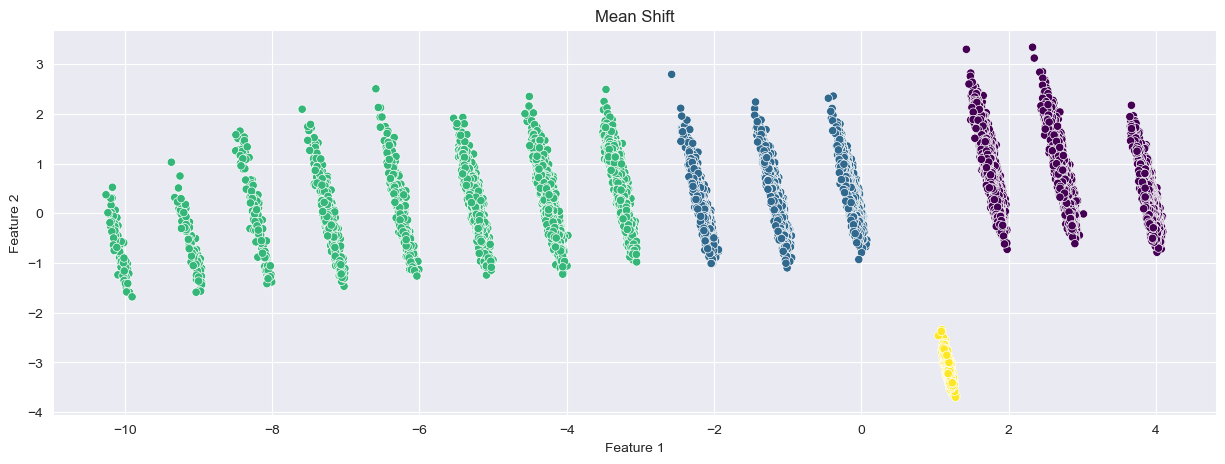

In [222]:
plt.figure(figsize=(15,5))
sns.scatterplot(x = final_df.iloc[:, 0], y = final_df.iloc[:, 1],c= labels_shift ,cmap='viridis')
plt.title("Mean Shift")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## Model Evaluation & Comparison

In [224]:
silhouette_scores = [silhouette_kmeans, silhouette_medoid, silhouette_hier, silhouette_gm,
                     silhouette_dbscan,silhouette_optics,silhouette_shift]

davies_bouldin_scores = [davies_bouldin_kmeans, davies_bouldin_medoid, davies_bouldin_hier, davies_bouldin_gm,
                         davies_bouldin_dbscan, davies_bouldin_optics, davies_bouldin_shift ]

In [225]:
model_scores = pd.DataFrame({"Silhouette_Scores": silhouette_scores,
                              "Davies_Bouldin_Scores": davies_bouldin_scores}, index=['K-Means', 'K-Medoid', 'Hierarchical',
                                                                                      'Gaussian Mixture',  'DBSCAN', 'OPTICS', 'Mean Shift'])
model_scores = model_scores.reset_index()
model_scores = model_scores.rename(columns = {"index":"Models"})
model_scores

Models  Silhouette_Scores  Davies_Bouldin_Scores
0           K-Means           0.591731               0.466915
1          K-Medoid           0.589889               0.469483
2      Hierarchical           0.600494               0.522611
3  Gaussian Mixture           0.600075               0.517711
4            DBSCAN           0.603061               0.471545
5            OPTICS           0.603061               0.471545
6        Mean Shift           0.621509               0.500860

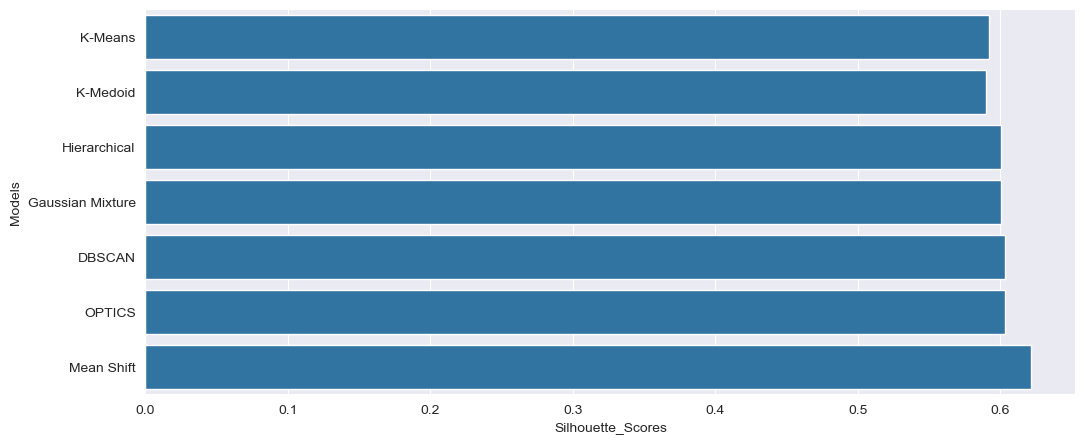

In [226]:
plt.figure(figsize=(12,5))
sns.barplot(y = "Models", x = "Silhouette_Scores", data = model_scores)
plt.show()

<Axes: xlabel='Davies_Bouldin_Scores', ylabel='Models'>

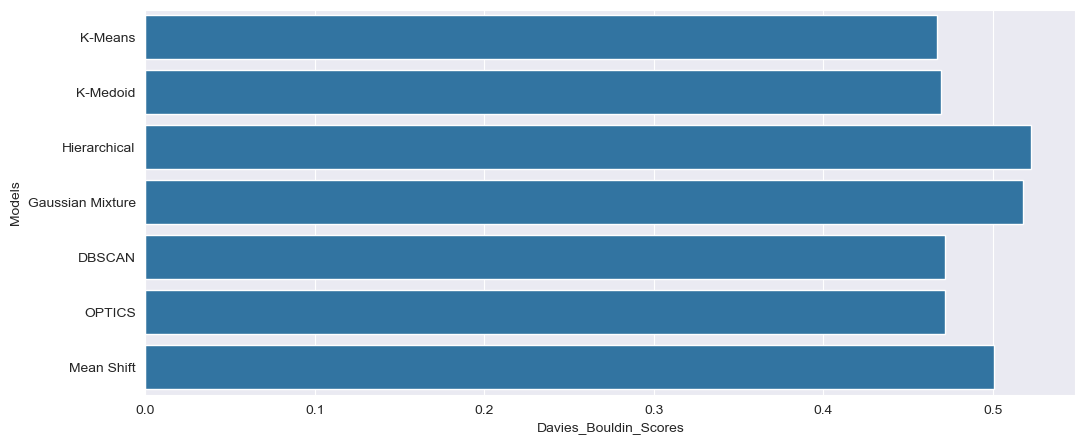

In [227]:
plt.figure(figsize=(12,5))
sns.barplot(y = "Models", x = "Davies_Bouldin_Scores", data = model_scores)

## Model Performance Overview by scores

## Clustering Models Evaluation: Silhouette Score and Davies-Bouldin Score

Several clustering algorithms were evaluated using two key performance metrics:
- **Silhouette Score**: Measures how well-separated and compact the clusters are. A higher value indicates better-defined clusters.
- **Davies-Bouldin Score**: Measures the average similarity ratio of each cluster with the other clusters. A lower value indicates better clustering quality (more compact and well-separated clusters).

Below are the results for the various clustering algorithms:

### **1. K-Means**
- **Silhouette Score**: 0.5917
- **Davies-Bouldin Score**: 0.4669
- **Insights**:
  - **Silhouette Score** of 0.5917 indicates moderately well-separated and compact clusters.
  - **Davies-Bouldin Score** of 0.4669 suggests that the clusters are relatively well-separated and compact, which is a good clustering result.

### **2. K-Medoids**
- **Silhouette Score**: 0.5899
- **Davies-Bouldin Score**: 0.4695
- **Insights**:
  - **Silhouette Score** of 0.5899 is very close to K-Means, indicating that the clusters are fairly well-separated.
  - **Davies-Bouldin Score** of 0.4695 is slightly higher than K-Means, indicating that the clusters may not be as compact as those of K-Means, but    still reasonably well-separated.

### **3. Hierarchical Clustering**
- **Silhouette Score**: 0.6005
- **Davies-Bouldin Score**: 0.5226
- **Insights**:
  - **Silhouette Score** of 0.6005 is slightly better than K-Means and K-Medoids, indicating more distinct and compact clusters.
  - **Davies-Bouldin Score** of 0.5226 is higher than K-Means and K-Medoids, meaning the clusters are still compact but less optimal in terms of separation.

### **4. Gaussian Mixture**
- **Silhouette Score**: 0.6001
- **Davies-Bouldin Score**: 0.5177
- **Insights**:
  - **Silhouette Score** of 0.6001 is close to Hierarchical Clustering, suggesting that the clusters are well-separated and compact.
  - **Davies-Bouldin Score** of 0.5177 is slightly better than Hierarchical Clustering, indicating that the clusters are more compact, but still fairly well-separated.

### **5. DBSCAN**
- **Silhouette Score**: 0.6031
- **Davies-Bouldin Score**: 0.4715
- **Insights**:
  - **Silhouette Score** of 0.6031 is one of the highest, suggesting very well-separated and compact clusters.
  - **Davies-Bouldin Score** of 0.4715 is low, indicating that DBSCAN’s clusters are compact with excellent separation.

### **6. OPTICS (Ordering Points To Identify the Clustering Structure)**
- **Silhouette Score**: 0.6031
- **Davies-Bouldin Score**: 0.4715
- **Insights**:
  - **Silhouette Score** of 0.6031 is identical to DBSCAN, showing excellent separation and compactness of clusters.
  - **Davies-Bouldin Score** of 0.4715 is also identical to DBSCAN, which suggests that OPTICS provides similarly good clustering performance.

### **7. Mean Shift**
- **Silhouette Score**: 0.6215
- **Davies-Bouldin Score**: 0.5009
- **Insights**:
  - **Silhouette Score** of 0.6215 is the highest among all models, suggesting the best separation and compactness of clusters.
  - **Davies-Bouldin Score** of 0.5009 is higher than DBSCAN and OPTICS, indicating that while Mean Shift produces the most distinct clusters, its clusters are less compact than those produced by DBSCAN and OPTICS.



### **Comparison and Best Models Based on Both Metrics**:
- **Top Models Based on Both** **Silhouette Score** and **Davies-Bouldin Score**:
    1. **Mean Shift**
        - **Best Silhouette Score** (0.6215) suggests that it provides the best cluster separation and compactness.
        - Although the **Davies-Bouldin Score** (0.5009) is higher than DBSCAN and OPTICS, it still indicates good clustering quality.
    
    2. **DBSCAN**
        - **Silhouette Score** (0.6031) indicates very good separation and compactness.
        - **Davies-Bouldin Score** (0.4715) is low, showing that DBSCAN’s clusters are compact and well-separated.
    
    3. **OPTICS**
        - Shares the **highest Silhouette Score** (0.6031) with DBSCAN, suggesting well-separated and compact clusters.
        - **Davies-Bouldin Score** (0.4715) is also identical to DBSCAN, indicating that OPTICS offers a comparable clustering structure.
    
    4. **Gaussian Mixture**
        - **Silhouette Score** (0.6001) is slightly lower than DBSCAN and OPTICS but still indicates good cluster separation.
        - **Davies-Bouldin Score** (0.5177) is better than Hierarchical Clustering and indicates reasonably compact clusters.

# Challenges Faced in Clustering


- **Missing Data**:
  - The dataset contained missing values, which could affect the clustering results if not handled correctly. Proper techniques, such as imputation or removal, were needed to ensure that the clustering process was not skewed by incomplete data.

- **Choosing the Right Features**:
  - Selecting the most relevant features for clustering was important. Including too many irrelevant or highly similar features could introduce noise, making it harder for the algorithm to find meaningful clusters. Careful feature selection was necessary for effective clustering.

- **Scaling the Features**:
  - The **Min-Max Scaler** was used to scale the features to a comparable range. This step was crucial to prevent features with larger ranges from dominating the clustering process, ensuring that all features contributed equally to the clustering results.

- **Curse of Dimensionality**:
  - High-dimensional data can make clustering less effective, as the distance metrics used for measuring similarity become less reliable. This "curse of dimensionality" can lead to less meaningful clustering results.
  - Dimensionality reduction techniques like **Principal Component Analysis (PCA)** were considered to reduce the number of features, but balancing the reduction of dimensions with the retention of important information was a challenging task.


### **Conclusion**:

- **Mean Shift** stands out with the **highest Silhouette Score** (0.6215), making it the best in terms of cluster separation and compactness.
- **DBSCAN** and **OPTICS** perform excellently, offering a balance between compactness (low Davies-Bouldin Score) and separation (high Silhouette Score).
- **Gaussian Mixture** provides a good alternative, performing similarly to Hierarchical Clustering but with a slightly better Davies-Bouldin Score.

Based on both metrics, **Mean Shift**, **DBSCAN**, and **OPTICS** are the top three choices, with **Mean Shift** being slightly ahead due to its highest Silhouette Score. **Gaussian Mixture** is also a good alternative but is slightly behind the top models.

<h3 style="text-align: center;"> Cluster Comparisons</h3>

In [228]:
df1 = pd.read_csv('players_20.csv')
data = df1.select_dtypes(['int','float']).drop(columns = ['sofifa_id'])
data['labels_meanshift'] = labels_shift

<h3 style="text-align: center;"> Average Values for Specific Clusters</h3>

In [230]:
cluster_1 = data[data['labels_meanshift'] == 0]
cluster_2 = data[data['labels_meanshift'] == 1]
cluster_3 = data[data['labels_meanshift'] == 2]
cluster_4 = data[data['labels_meanshift'] == 3]

cluster_comparison = pd.DataFrame({
    'Cluster 1': cluster_1.mean(),
    'Cluster 2': cluster_2.mean(),
    'Cluster 3': cluster_3.mean(),
    'Cluster 4': cluster_4.mean()
})
cluster_comparison = cluster_comparison.transpose()

In [231]:
cluster_comparison

age   height_cm  weight_kg    overall  potential  \
Cluster 1  25.314099  183.077737  76.851959  66.339927  71.718785   
Cluster 2  25.526602  179.319228  73.463252  66.412274  71.186835   
Cluster 3  24.525797  176.726548  70.870310  66.601313  72.263837   
Cluster 4  26.266699  188.437623  81.960216  64.796660  70.089882   

              value_eur      wage_eur  international_reputation  weak_foot  \
Cluster 1  2.564829e+06   9813.531561                  1.112133   2.972030   
Cluster 2  2.062866e+06   8811.185350                  1.084385   2.902747   
Cluster 3  3.093789e+06  10736.866792                  1.111398   3.154315   
Cluster 4  1.728016e+06   6667.976424                  1.088409   2.478389   

           skill_moves  release_clause_eur  team_jersey_number  \
Cluster 1     2.387930        4.900636e+06           19.541236   
Cluster 2     2.395694        3.943086e+06           19.158040   
Cluster 3     2.958021        5.914000e+06           21.572208   
Cluster 4     1.000000        3.282956e+06           21.099198   

           contract_valid_until  nation_jersey_number       pace   shooting  \
Cluster 1           2021.111154             11.568710  63.417412  51.015623   
Cluster 2           2021.125628             11.265306  68.702796  46.964365   
Cluster 3           2021.154849             14.210728  74.724672  59.740854   
Cluster 4           2021.021042             11.564626        NaN        NaN   

             passing  dribbling  defending     physic  gk_diving  gk_handling  \
Cluster 1  53.905002  58.855487  51.918735  67.291546        NaN          NaN   
Cluster 2  58.914378  63.135857  63.639941  67.586241        NaN          NaN   
Cluster 3  61.837242  68.801595  39.419325  57.813790        NaN          NaN   
Cluster 4        NaN        NaN        NaN        NaN  65.422397    63.146365   

           gk_kicking  gk_reflexes   gk_speed  gk_positioning  \
Cluster 1         NaN          NaN        NaN             NaN   
Cluster 2         NaN          NaN        NaN             NaN   
Cluster 3         NaN          NaN        NaN             NaN   
Cluster 4   61.832515    66.390472  37.798625       63.374754   

           attacking_crossing  attacking_finishing  \
Cluster 1           47.228298            48.620638   
Cluster 2           59.641425            42.203662   
Cluster 3           61.946998            59.389306   
Cluster 4           14.120334            11.598723   

           attacking_heading_accuracy  attacking_short_passing  \
Cluster 1                   61.608416                61.033262   
Cluster 2                   56.608760                64.055679   
Cluster 3                   48.775094                64.626407   
Cluster 4                   14.138016                26.993615   

           attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
Cluster 1          45.691445        56.335391    47.100668          42.984629   
Cluster 2          41.016828        61.569661    51.355853          45.358080   
Cluster 3          53.864681        68.595685    59.575985          53.297139   
Cluster 4          11.978880        13.636542    14.548134          14.200884   

           skill_long_passing  skill_ball_control  movement_acceleration  \
Cluster 1           53.780900           60.949729              62.961572   
Cluster 2           58.613215           63.548379              68.748330   
Cluster 3           58.175657           67.523921              75.282129   
Cluster 4           25.900295           19.690079              37.688114   

           movement_sprint_speed  movement_agility  movement_reactions  \
Cluster 1              63.761623         61.731763           62.183193   
Cluster 2              68.660480         67.124722           63.110864   
Cluster 3              74.284240         74.702627           61.185976   
Cluster 4              37.873281         39.781434           58.564342   

           movement_balance  power_shot_power  power_jumping 

<h3 style="text-align: center;"> Player positions based on Clusters</h3>

In [233]:
df1['player_positions']= df1.player_positions.str.split(',').str[0]
df1['labels_meanshift'] = labels_shift

In [234]:
clustr_1__player_positions = list(df1.loc[df1.labels_meanshift==0,'player_positions'].unique())
clustr_2__player_positions = list(df1.loc[df1.labels_meanshift==1,'player_positions'].unique())
clustr_3__player_positions = list(df1.loc[df1.labels_meanshift==2,'player_positions'].unique())
clustr_4__player_positions = list(df1.loc[df1.labels_meanshift==3,'player_positions'].unique())

In [235]:
Player_positions = pd.DataFrame({'Clusters':['Cluster_1','Cluster_2', 'Cluster_3', 'Cluster_4'],
              'Player_positions': [clustr_1__player_positions, clustr_2__player_positions,clustr_3__player_positions,clustr_4__player_positions]})
Player_positions

Clusters                     Player_positions
0  Cluster_1                         [ST, CB, CM]
1  Cluster_2                        [CDM, LB, RB]
2  Cluster_3  [RW, LW, CAM, CF, RM, LM, LWB, RWB]
3  Cluster_4                                 [GK]

<h3 style="text-align: center;"> Comparison of Player Attributes Across Clusters   </h3>

<Figure size 1200x800 with 0 Axes>

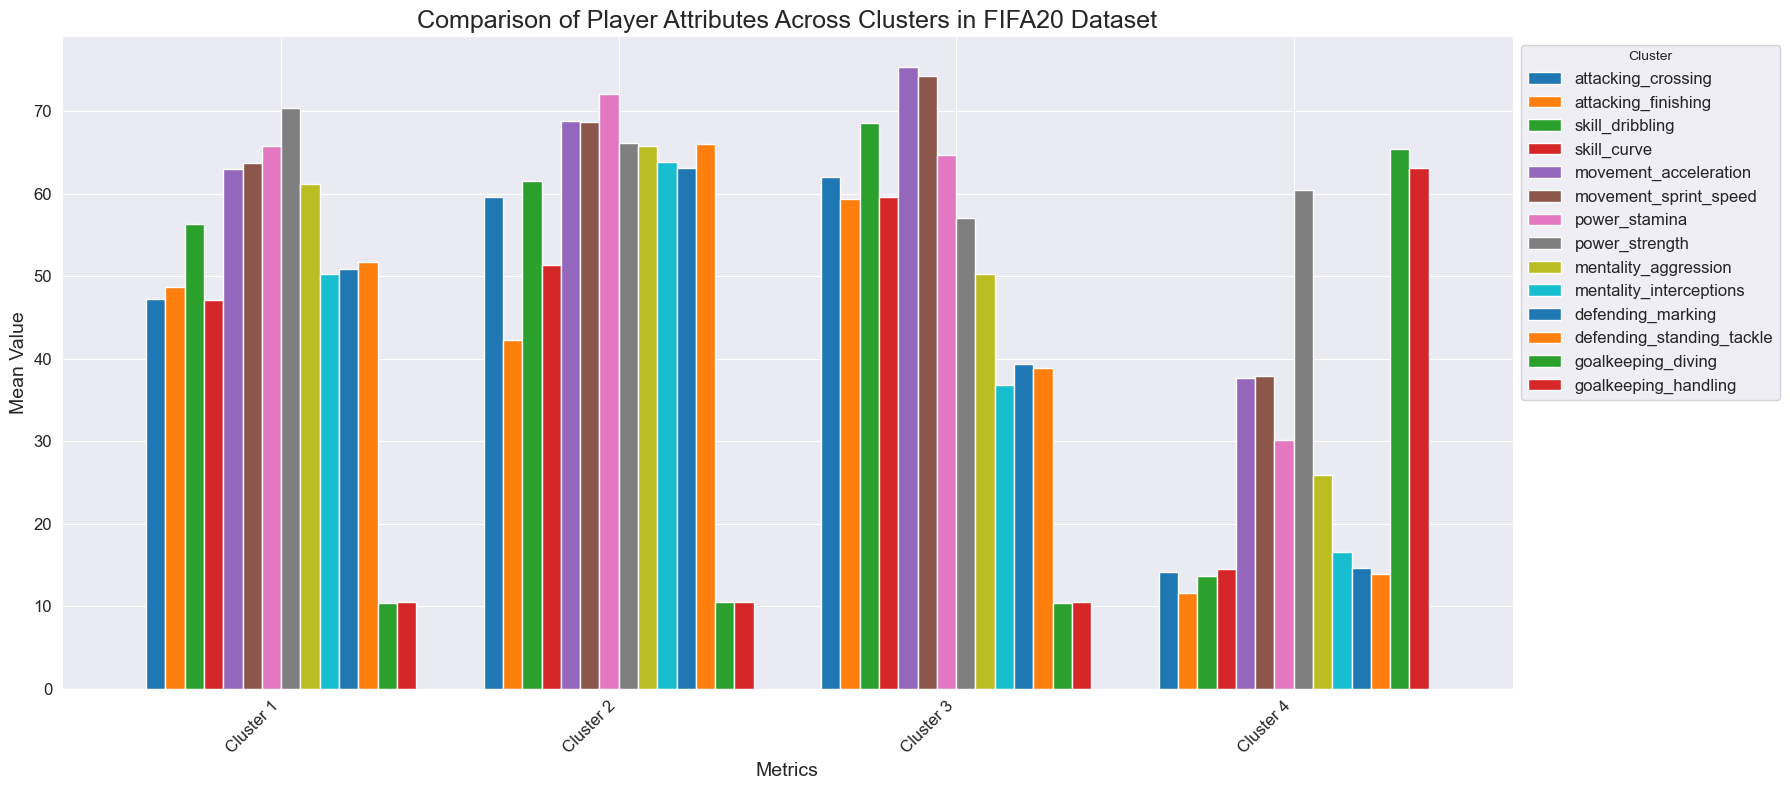

In [283]:
important_columns = ['attacking_crossing','attacking_finishing',  'skill_dribbling','skill_curve', 'movement_acceleration', 'movement_sprint_speed',
                     'power_stamina','power_strength', 'mentality_aggression', 'mentality_interceptions','defending_marking', 
                     'defending_standing_tackle','goalkeeping_diving','goalkeeping_handling']
plt.figure(figsize=(12,8))
cluster_comparison[important_columns].plot(kind='bar', width=0.8, figsize=(18,8)) 
plt.title('Comparison of Player Attributes Across Clusters in FIFA20 Dataset', fontsize=18)
plt.ylabel('Mean Value', fontsize=14)
plt.xlabel('Metrics', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Cluster', fontsize=12,loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()  
plt.show()


### Summary from Unique Clusters
#### **Cluster 1**:  
- **Positions**: Striker (ST), Center-Back (CB), Central Midfielder (CM)  
- **Characteristics**:  
  - Players in this cluster have a **balanced skill set**, combining **attacking**, **defensive**, and **physical attributes**.  
  - They are versatile and can adapt to various roles, making them valuable in maintaining midfield control or providing defensive stability.  
  - Suitable for teams focusing on transitional play and balanced gameplay strategies.  
---
#### **Cluster 2**:  
- **Positions**: Central Defensive Midfielder (CDM), Left-Back (LB), Right-Back (RB)  
- **Characteristics**:  
  - These players are specialized in **defensive skills**, excelling in **marking**, **tackling**, and **stamina**.  
  - They are crucial for breaking up opposition attacks and supporting the defensive structure.  
  - Ideal for roles that require robust defensive play and occasional offensive support.  
---
#### **Cluster 3**:  
- **Positions**: Right Winger (RW), Left Winger (LW), Central Attacking Midfielder (CAM), Center Forward (CF),  
  Right Midfielder (RM), Left Midfielder (LM), Left Wing-Back (LWB), Right Wing-Back (RWB)  
- **Characteristics**:  
  - These players excel in **dynamic attacking** and **wide roles**, with high **pace**, **dribbling skills**, and **offensive capabilities**.  
  - They are key creators and playmakers, often generating scoring opportunities and contributing to offensive momentum.  
  - Their versatility allows them to adapt to both attacking and wide defensive positions.  
---
#### **Cluster 4**:  
- **Positions**: Goalkeeper (GK)  
- **Characteristics**:  
  - Players in this cluster specialize in **goalkeeping skills**, including **diving**, **handling**, and **positioning**.  
  - They are indispensable for safeguarding the goal and ensuring defensive stability.  
  - Their attributes align exclusively with goalkeeping roles, making them highly specialized players.  
---
### Recommendations
The visualization highlights distinct differences across clusters, providing valuable insights into player specialization. These findings can guide key tactical decisions:  
1. **Formation Planning**:  
   - Assigning players to roles that align with their specific strengths ensures a well-structured team.  
2. **Recruitment**:  
   - Identifying skill gaps in the current squad and targeting players from appropriate clusters for reinforcement.  
3. **Player Development**:  
   - Focusing on areas where players in a specific cluster underperform, enhancing their overall contribution to the team.  

<h3 style="text-align: center;">All Three Tasks Completed Successfully.</h3>
